In [1]:
# Name:  Multi-Class Prediction of Obesity Risk
# Url:  https://www.kaggle.com/competitions/playground-series-s4e2/leaderboard
# username: the-usman


# The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats

In [3]:
train_df = pd.read_csv('data/competition_data/train.csv', index_col=[0])
original_df = pd.read_csv('data/original_data/ObesityDataSet.csv',)

In [4]:
train_df.head()


Gender        Age    Height      Weight family_history_with_overweight   
id                                                                           
0     Male  24.443011  1.699998   81.669950                            yes  \
1   Female  18.000000  1.560000   57.000000                            yes   
2   Female  18.000000  1.711460   50.165754                            yes   
3   Female  20.952737  1.710730  131.274851                            yes   
4     Male  31.641081  1.914186   93.798055                            yes   

   FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF   
id                                                                      
0   yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000  \
1   yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2   yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3   yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4   yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

         TUE       CALC                 MTRANS           NObeyesdad  
id                                                                   
0   0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1   1.000000         no             Automobile        Normal_Weight  
2   1.673584         no  Public_Transportation  Insufficient_Weight  
3   0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4   0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [5]:
train_df.shape

(20758, 17)

In [6]:
original_df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC   
0  Female  21.0    1.62    64.0                            yes   no   2.0  \
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC   
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no  \
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [7]:
original_df.shape

(2111, 17)

In [8]:
original_df.duplicated().sum()
original_df.drop_duplicates(inplace=True)

In [9]:
train_df.duplicated().sum()

0

<Axes: >

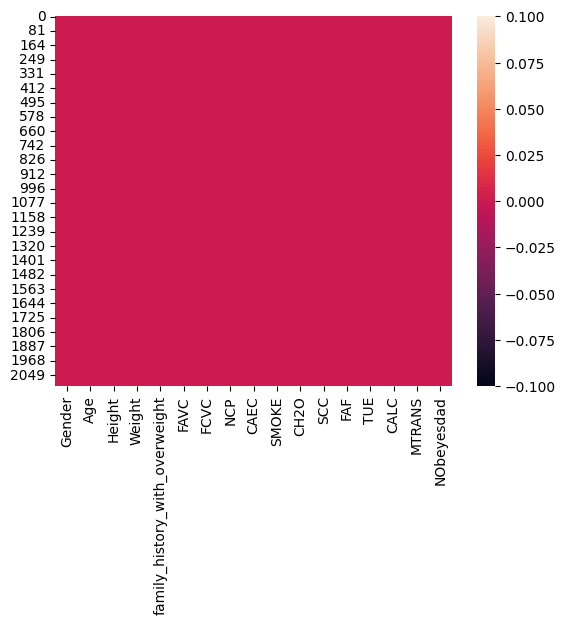

In [10]:
sns.heatmap(original_df.isna())

<Axes: ylabel='id'>

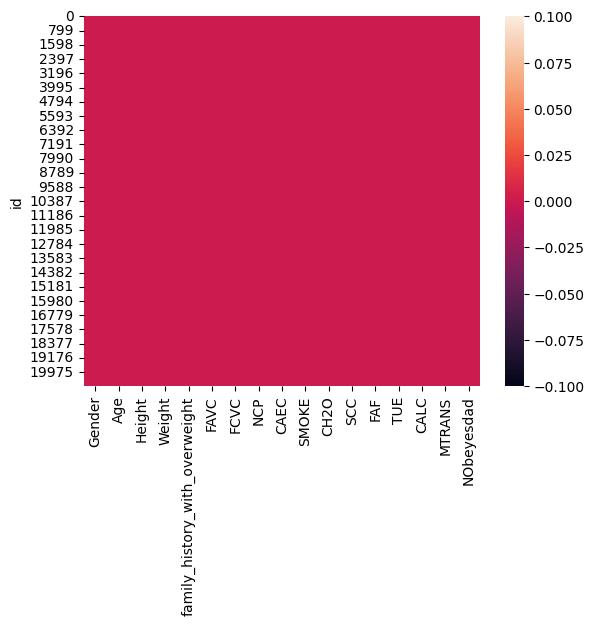

In [11]:
sns.heatmap(train_df.isna())

In [12]:
original_df.shape

(2087, 17)

In [13]:
merged_df = pd.concat([train_df, original_df], axis=0).reset_index()

In [14]:
inputs = merged_df.drop(["NObeyesdad", "index"], axis=1)
target = merged_df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.25, random_state=42)

In [15]:
X_train.shape

(17133, 16)

In [16]:
# Performing EDA 
def DataAnalysis1(data, column, original_data, merged_data) :
    cat_cols = data.select_dtypes('object')
    num_cols = data.select_dtypes(np.number)
    plt.figure(figsize=(14, 14))
    if column in cat_cols :
        plt.subplot(3,2,1)
        plt.title(f"Train Df Count Plot for {column}")
        sns.countplot(x=data[column], hue=data['NObeyesdad'])
        plt.subplot(3,2,2)
        plt.title(f"Train DF Pie plot for {column}")
        plt.pie(data[column].value_counts(), labels=data[column].value_counts().index,  autopct='%1.1f%%')


        plt.subplot(3,2,3)
        plt.title(f"Original DF Count Plot for {column}")
        sns.countplot(x=original_data[column], hue=original_data['NObeyesdad'])
        plt.subplot(3,2,4)
        plt.title(f"Original DF Pie plot for {column}")
        plt.pie(original_data[column].value_counts(), labels=original_data[column].value_counts().index,  autopct='%1.1f%%')

        plt.subplot(3,2,5)
        plt.title(f"Merge DF Count Plot for {column}")
        sns.countplot(x=merged_data[column], hue=merged_data['NObeyesdad'])
        plt.subplot(3,2,6)
        plt.title(f"Merge DF Pie plot for {column}")
        plt.pie(merged_data[column].value_counts(), labels=merged_data[column].value_counts().index,  autopct='%1.1f%%')
        plt.xticks(rotation=70)
        plt.tight_layout()
        plt.show()
        
    if column in num_cols :
        
        plt.subplot(3,2,1)
        plt.title(f"Train DF Histogram Plot for {column}")
        sns.histplot(x=data[column], hue=data['NObeyesdad'], kde=True)
        plt.subplot(3,2,2)
        plt.title(f"Train DF Box Plot for {column}")
        sns.boxplot(x=data[column], hue=data['NObeyesdad'])


        plt.subplot(3,2,3)
        plt.title(f"Original DF Histogram Plot for {column}")
        sns.histplot(x=original_data[column], hue=original_data['NObeyesdad'], kde=True)
        plt.subplot(3,2,4)
        plt.title(f"Original DF Box Plot for {column}")
        sns.boxplot(x=original_data[column], hue=original_data['NObeyesdad'])


        plt.subplot(3,2,5)
        plt.title(f"Merge DF Histogram Plot for {column}")
        sns.histplot(x=merged_data[column], hue=merged_data['NObeyesdad'], kde=True)
        plt.subplot(3,2,6)
        plt.title(f"Merge DF Box Plot for {column}")
        sns.boxplot(x=merged_data[column], hue=merged_data['NObeyesdad'])


        plt.show()




In [17]:
train_df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

<Figure size 1400x1400 with 0 Axes>

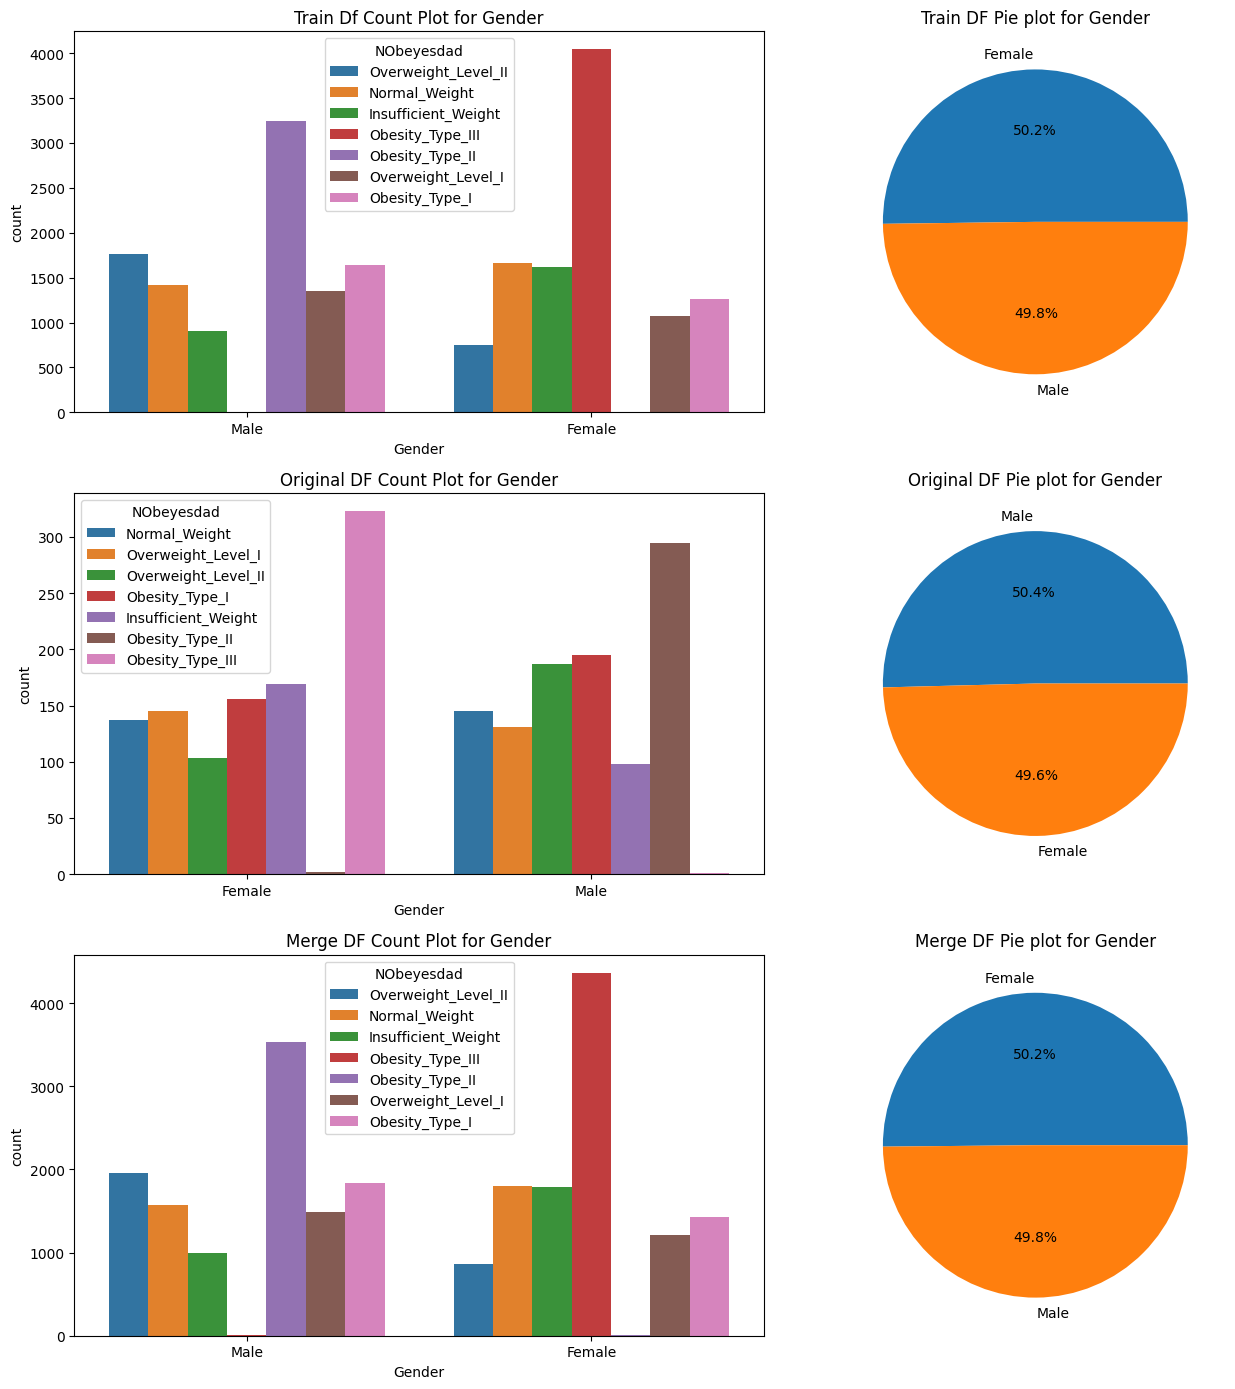

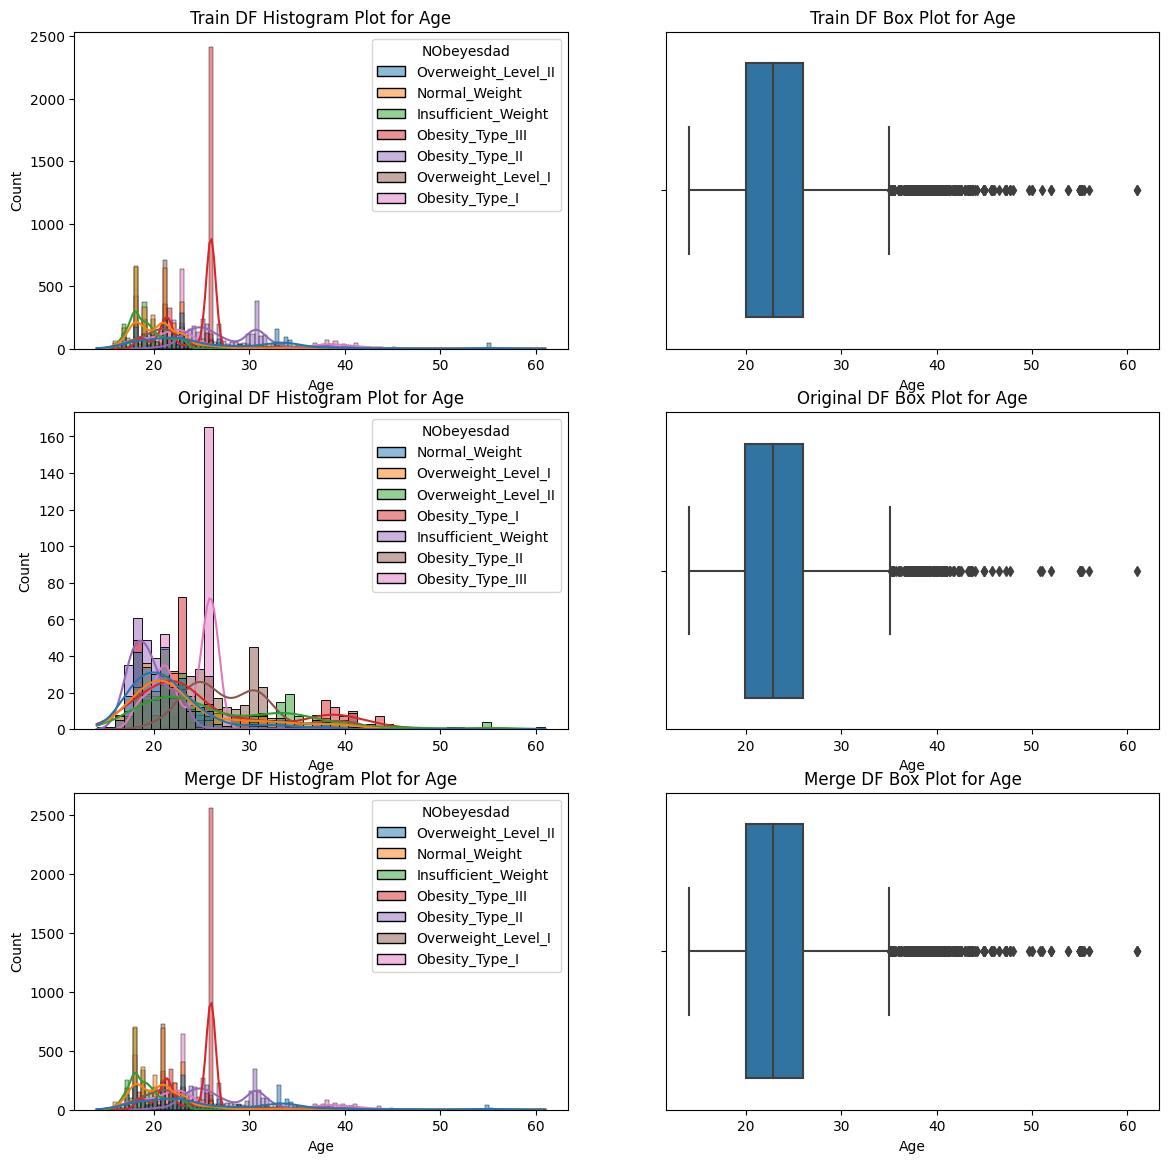

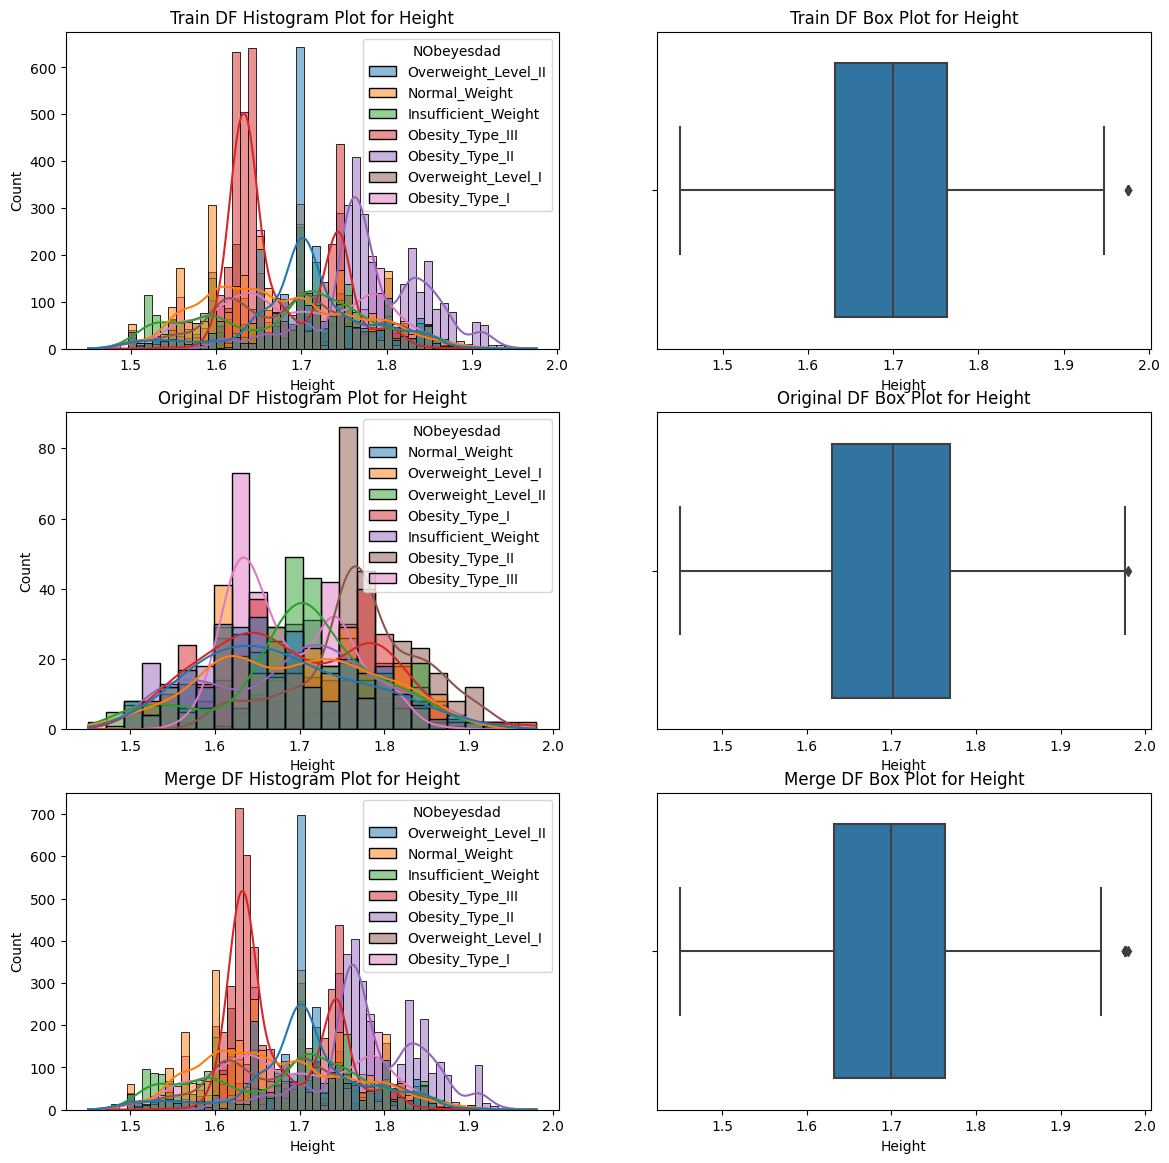

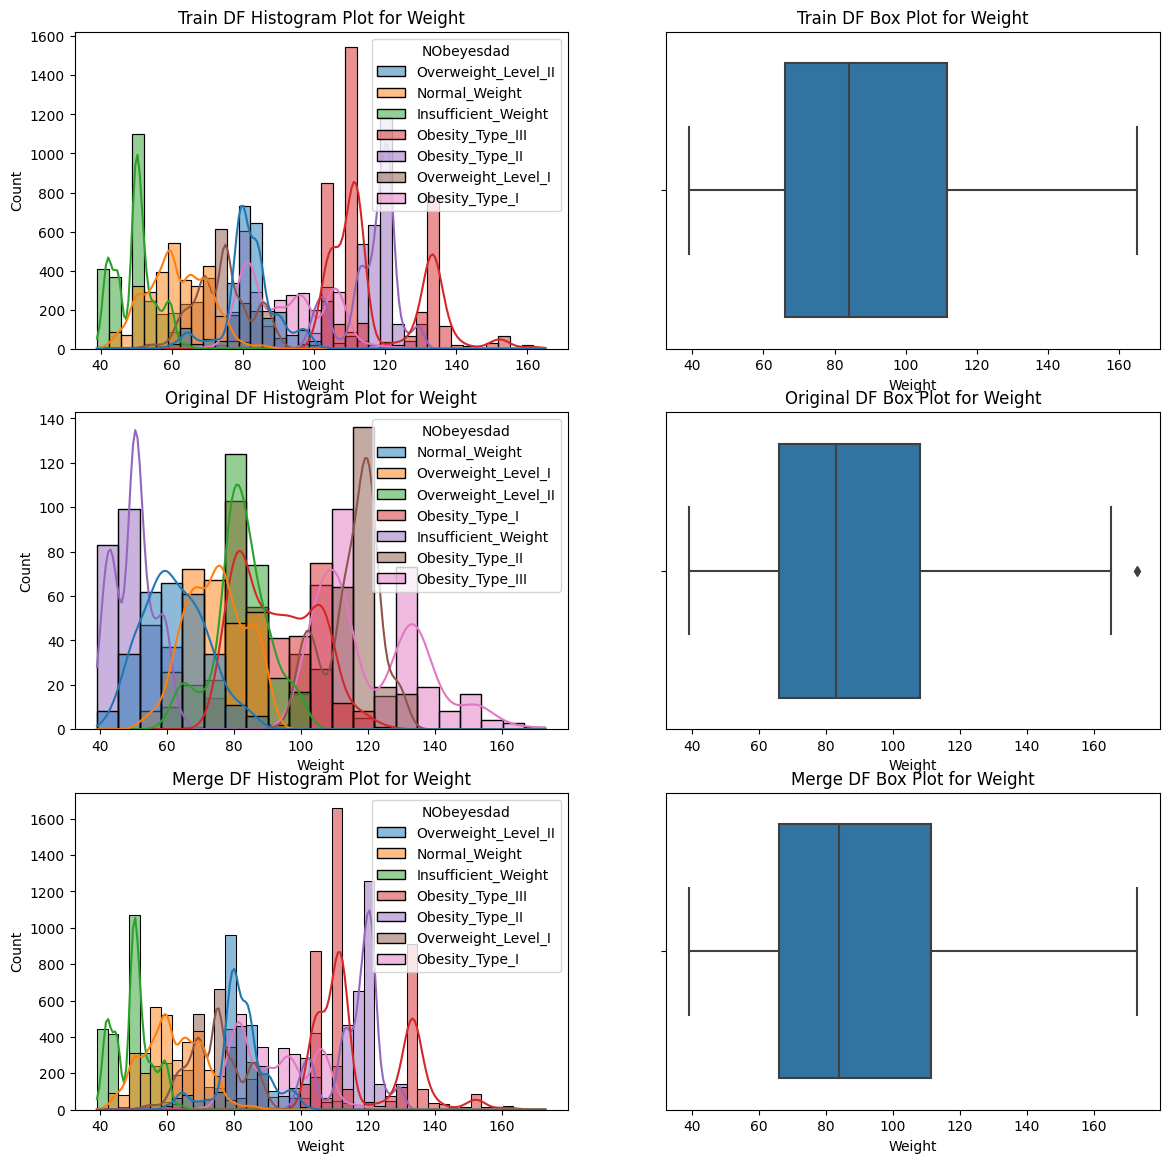

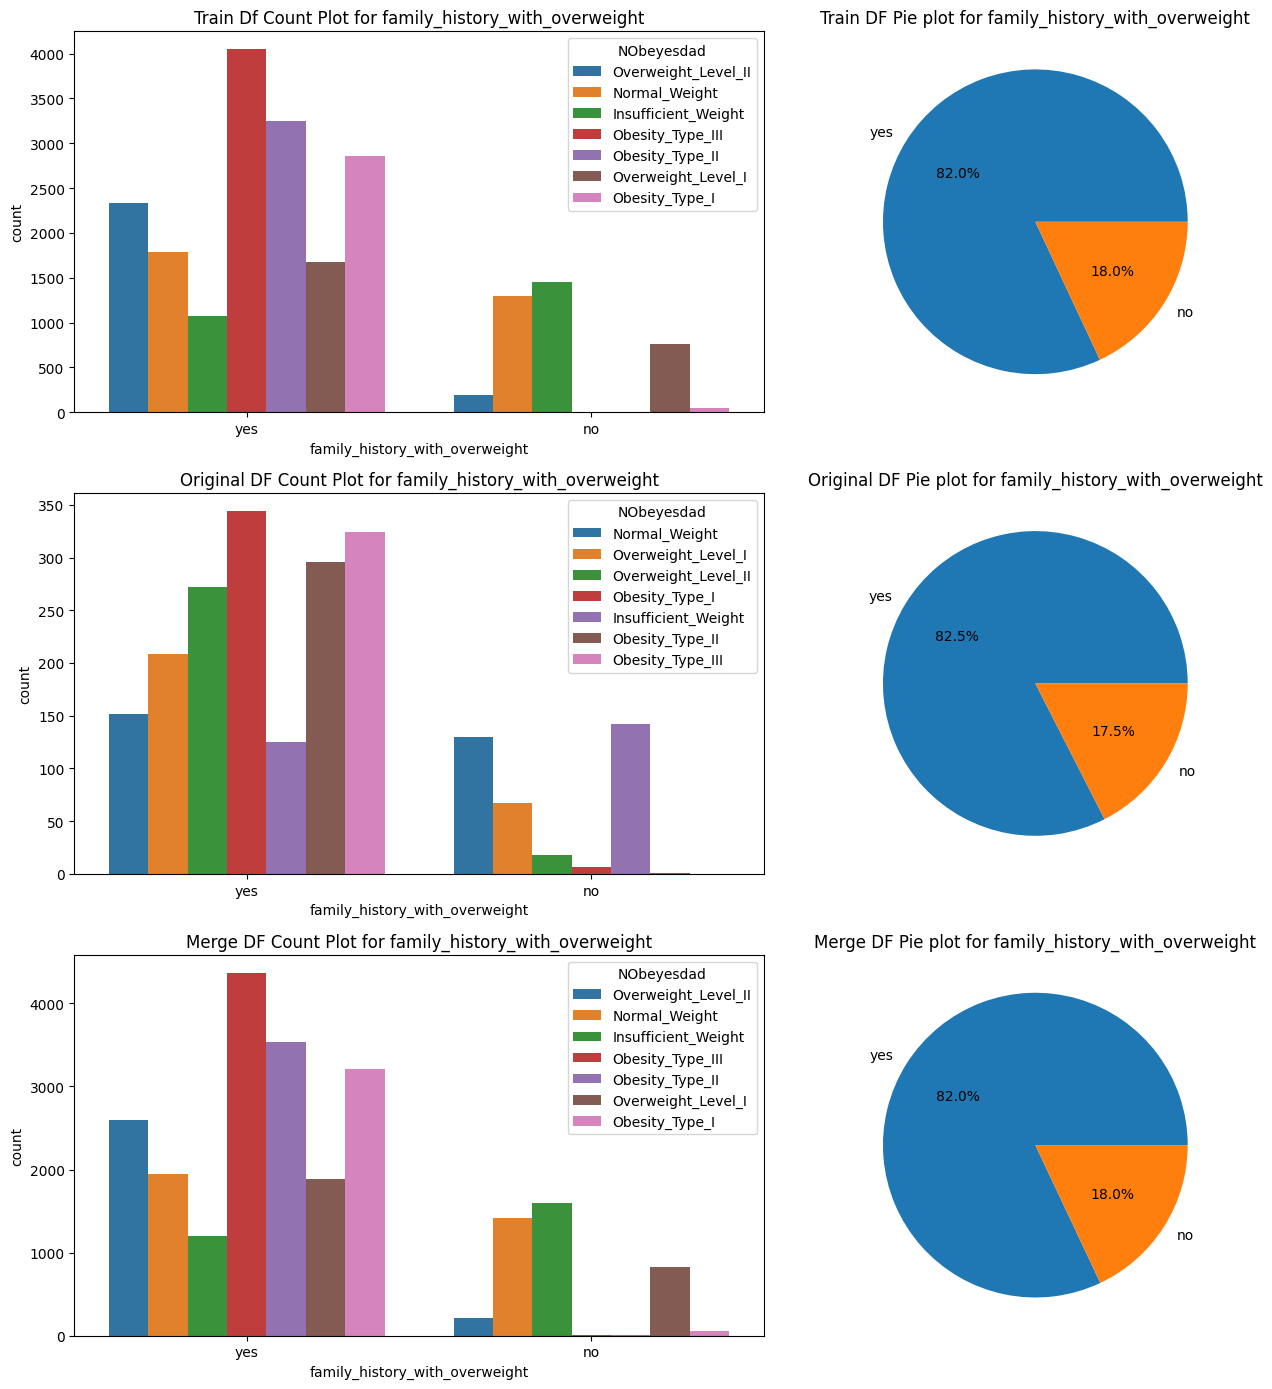

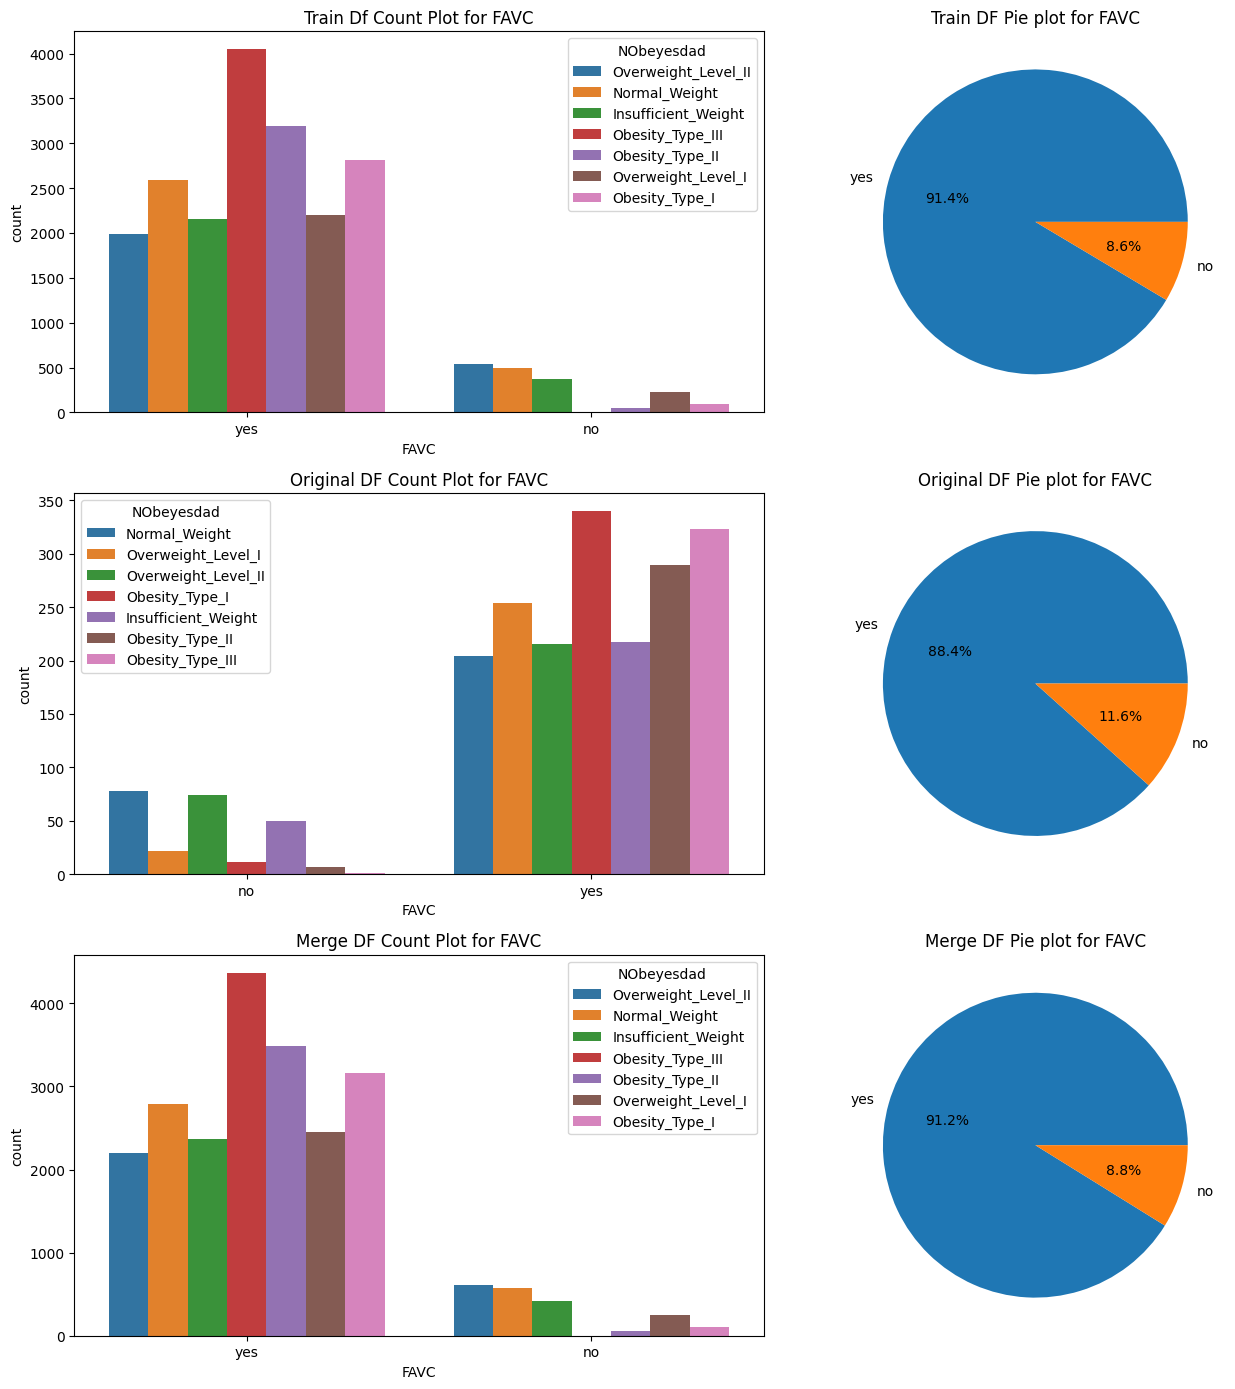

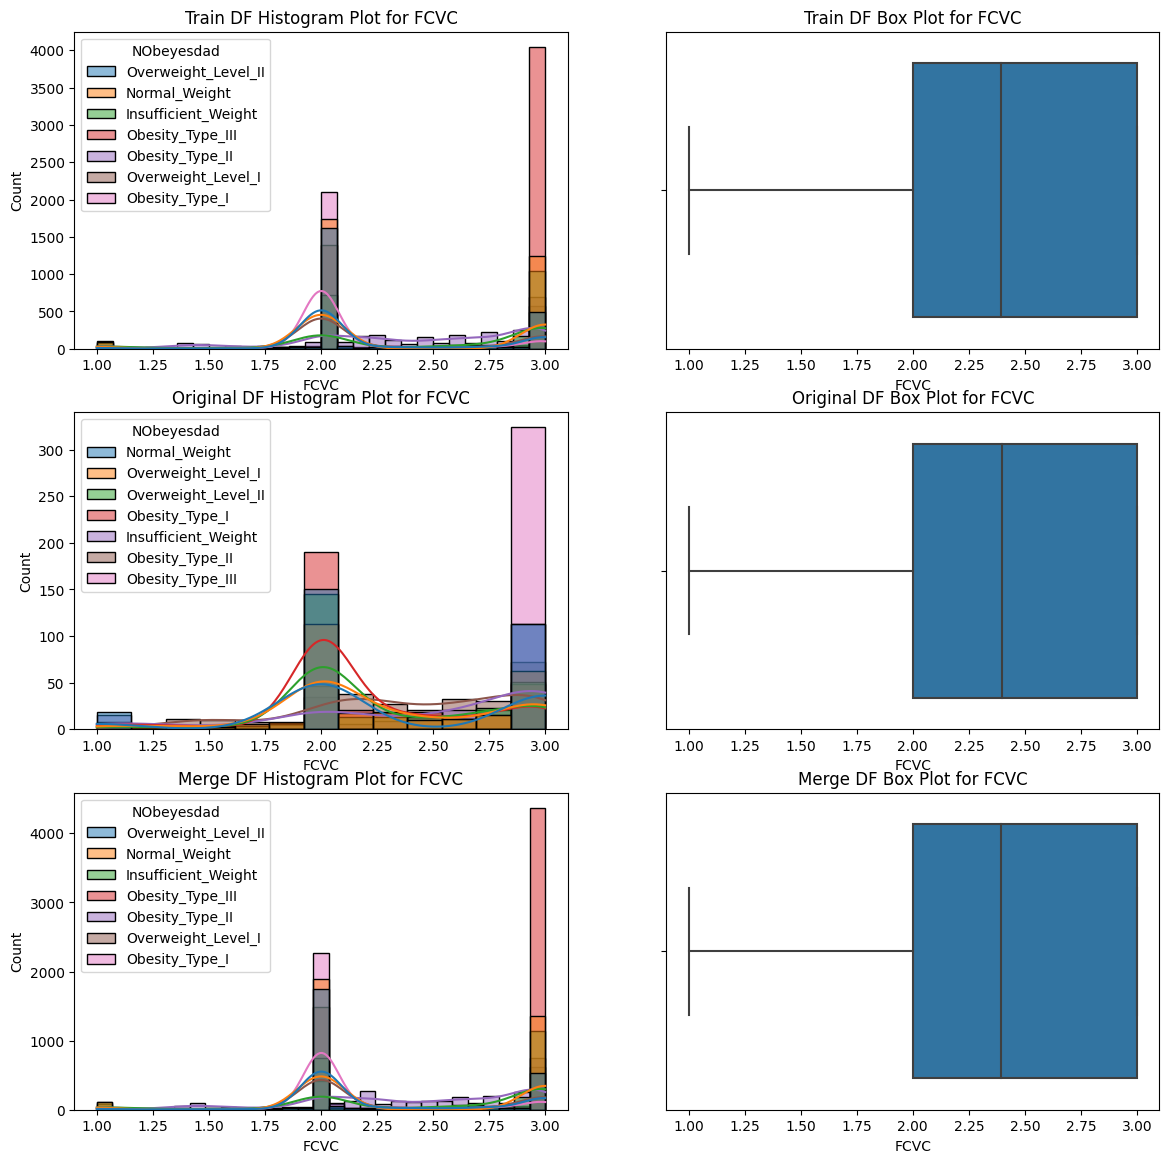

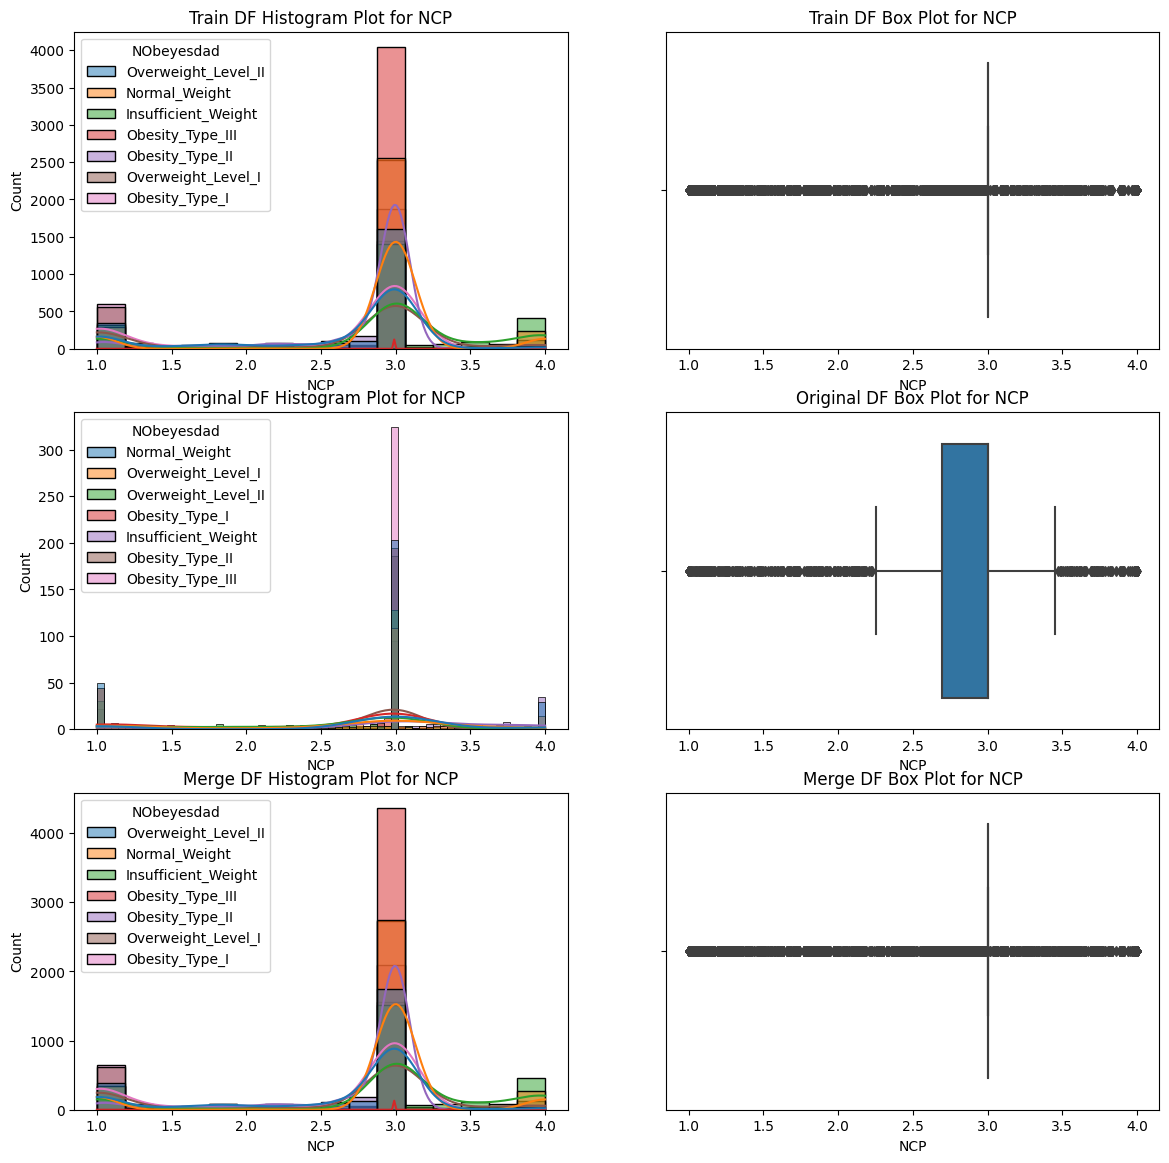

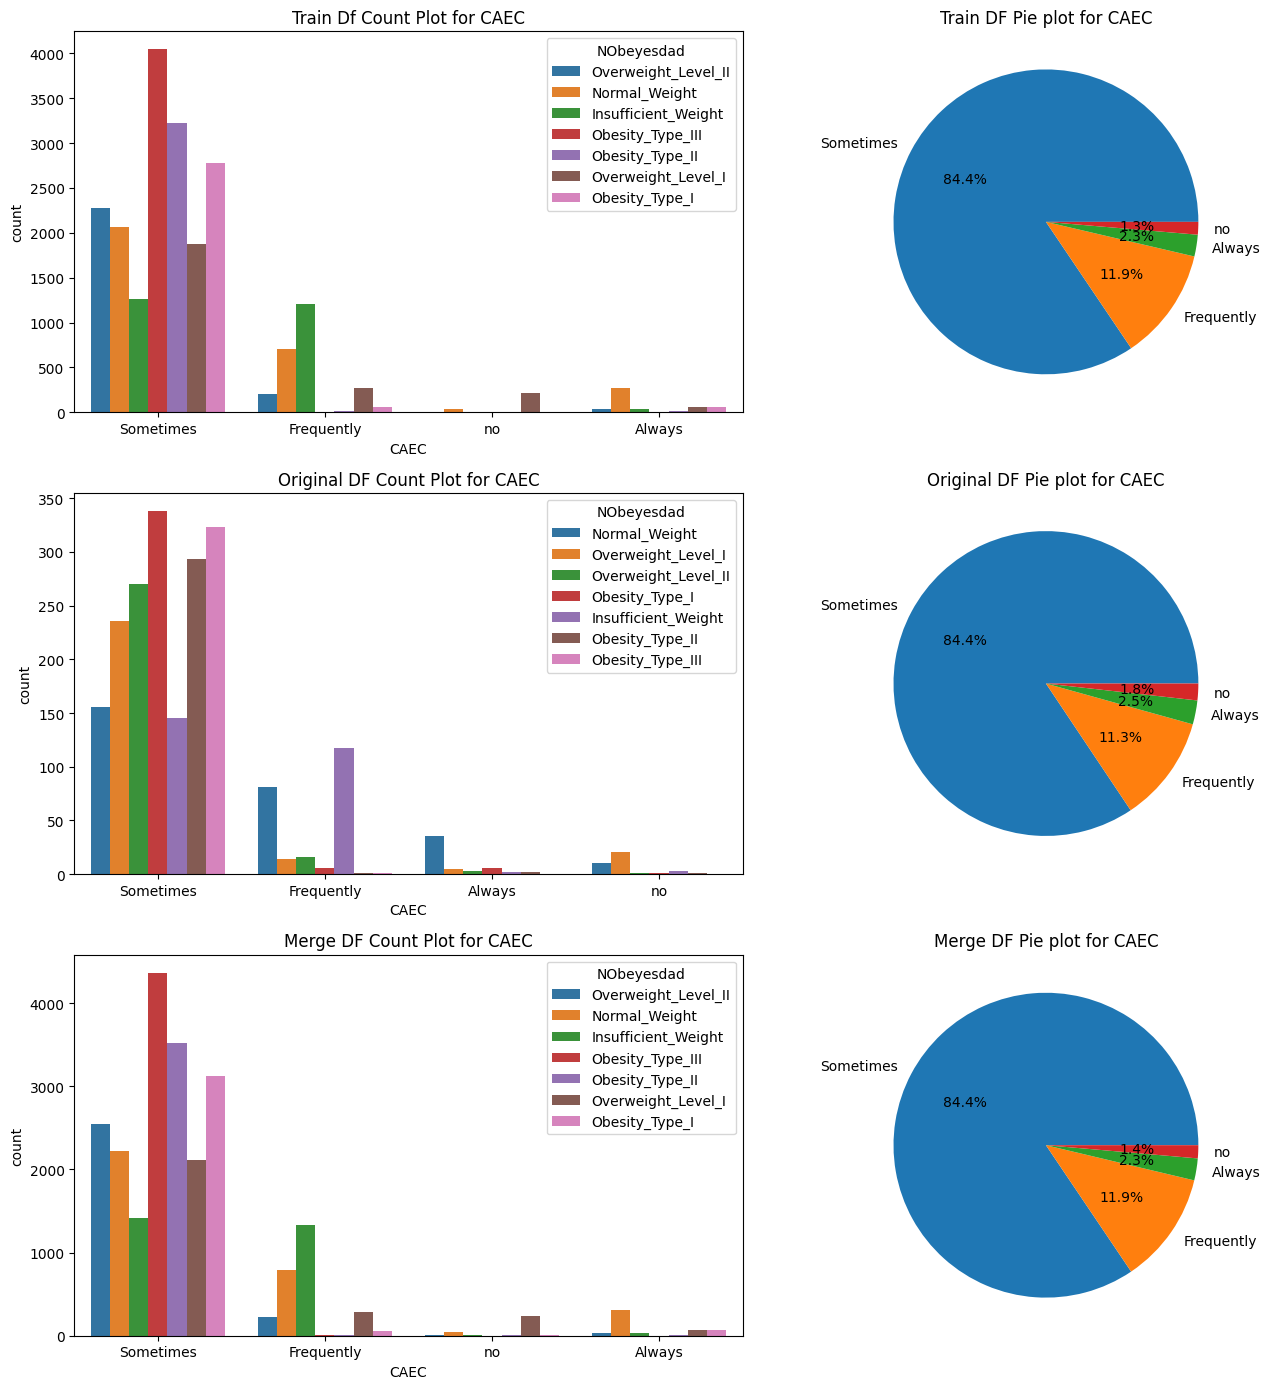

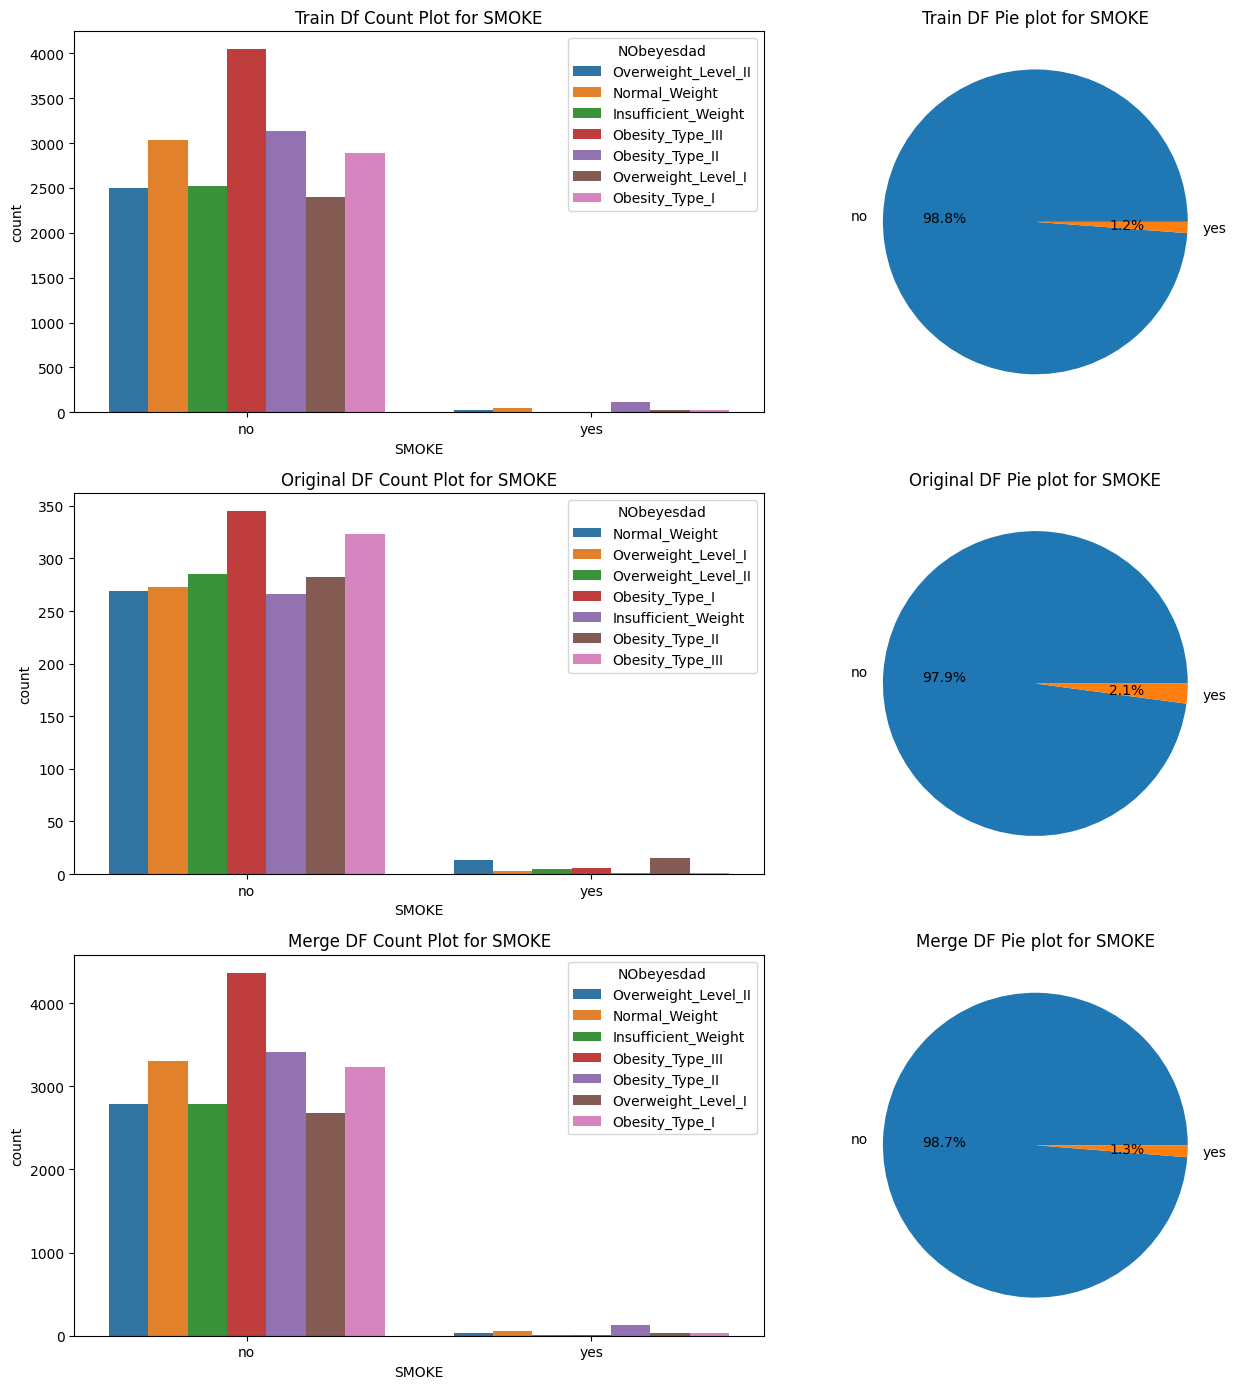

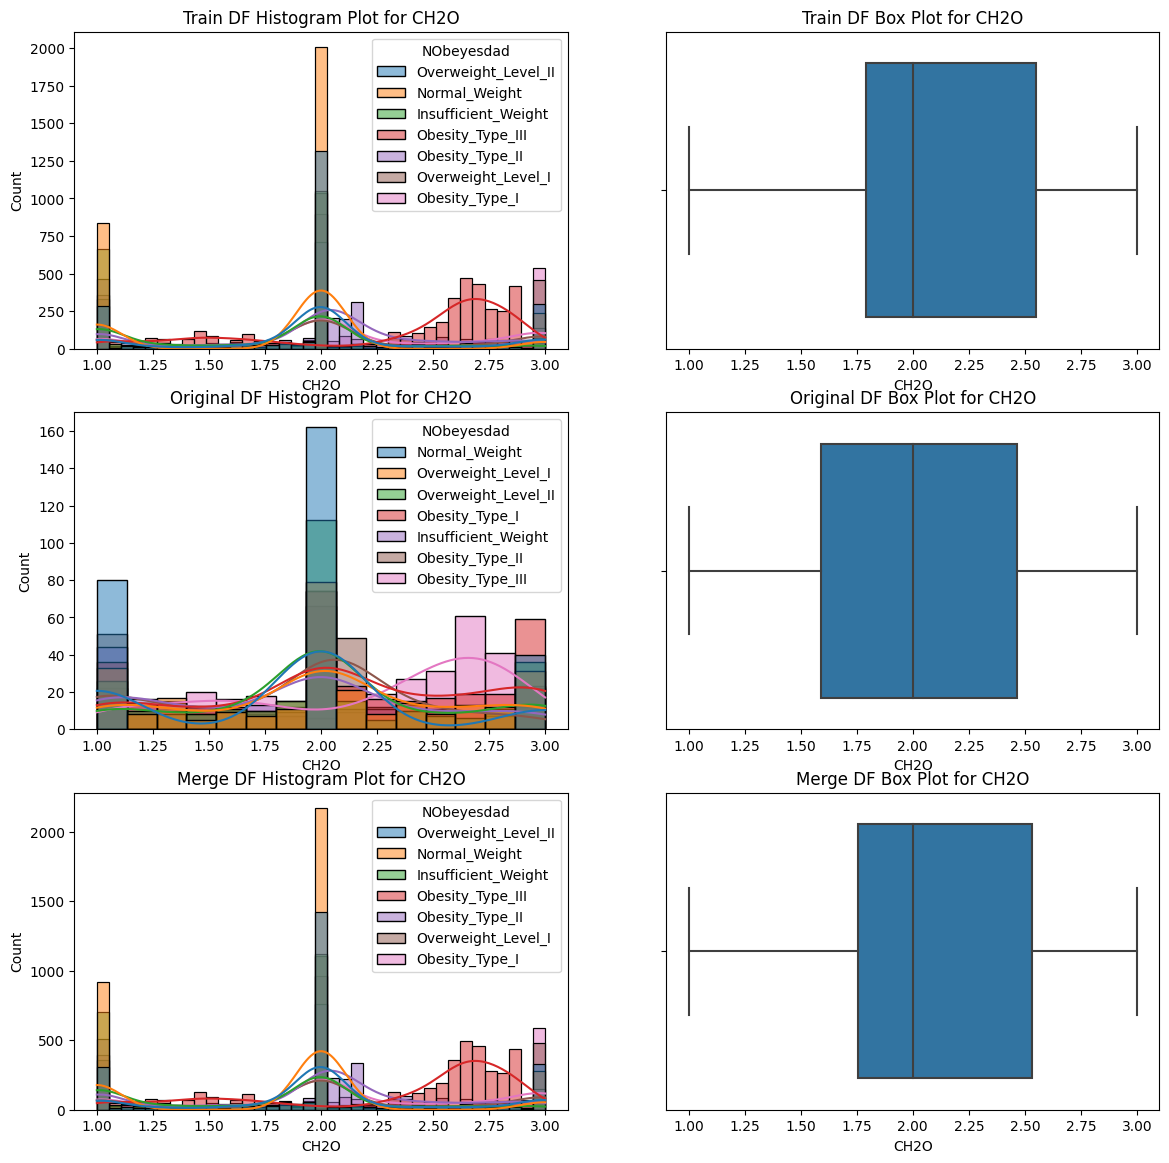

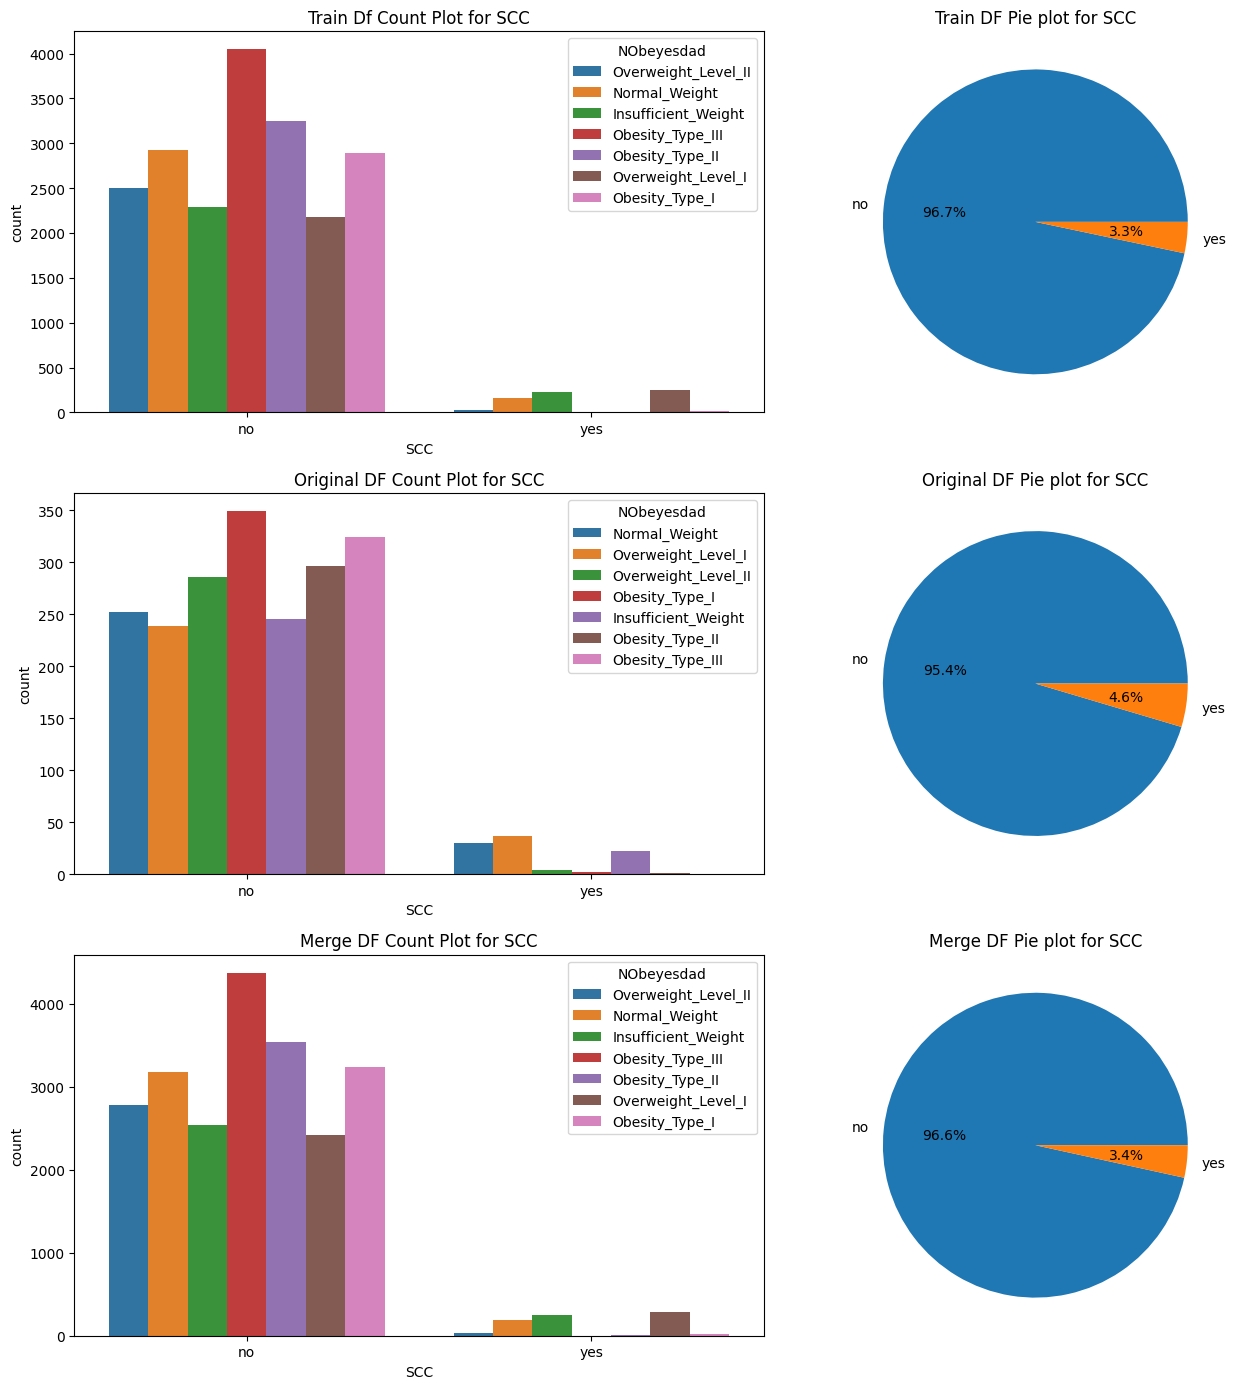

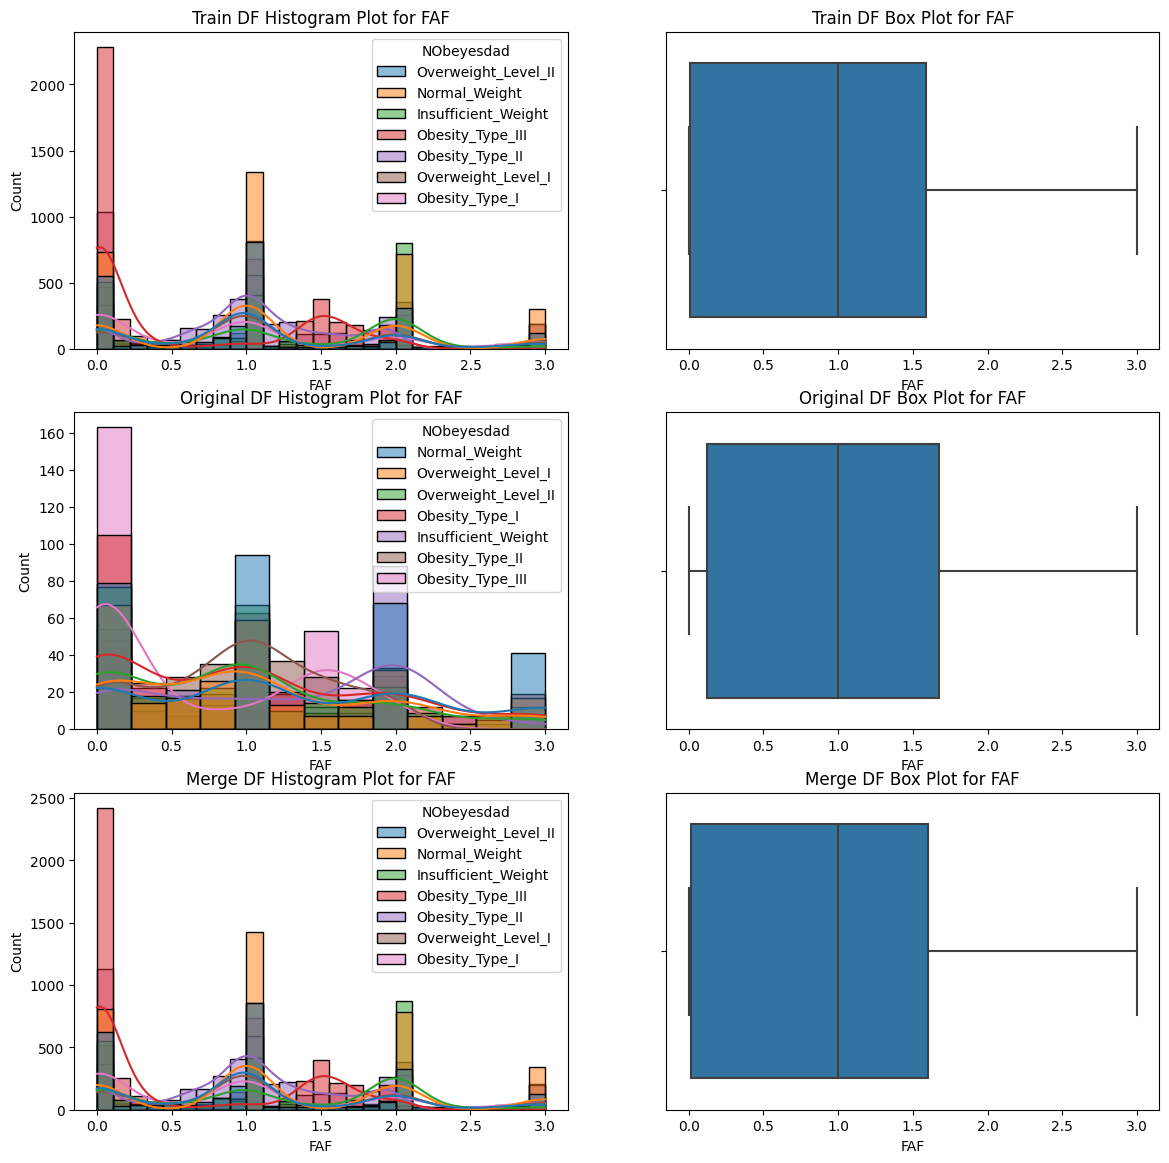

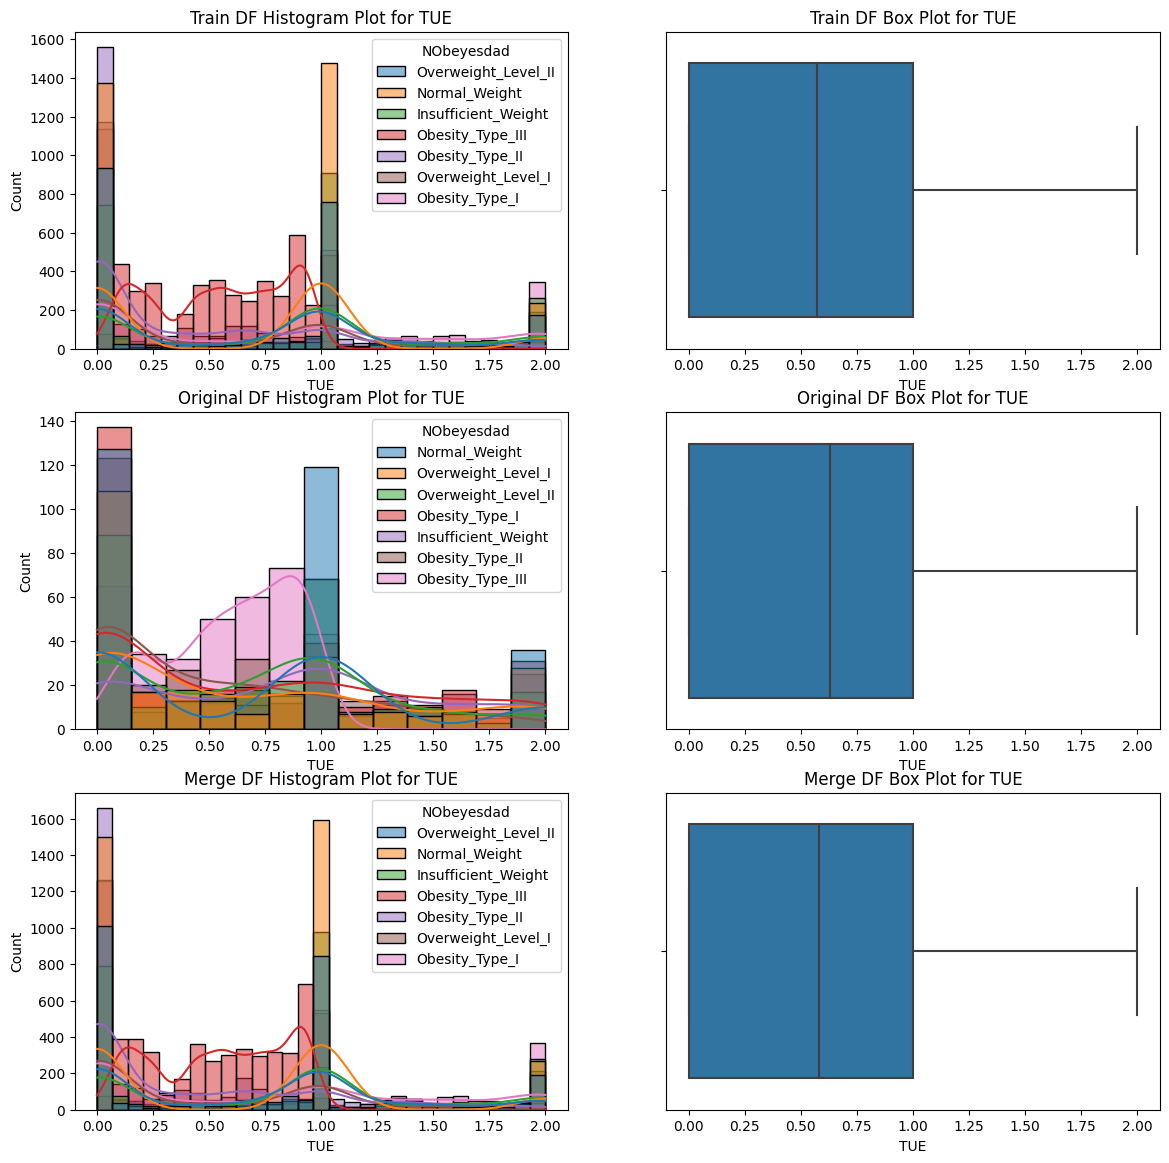

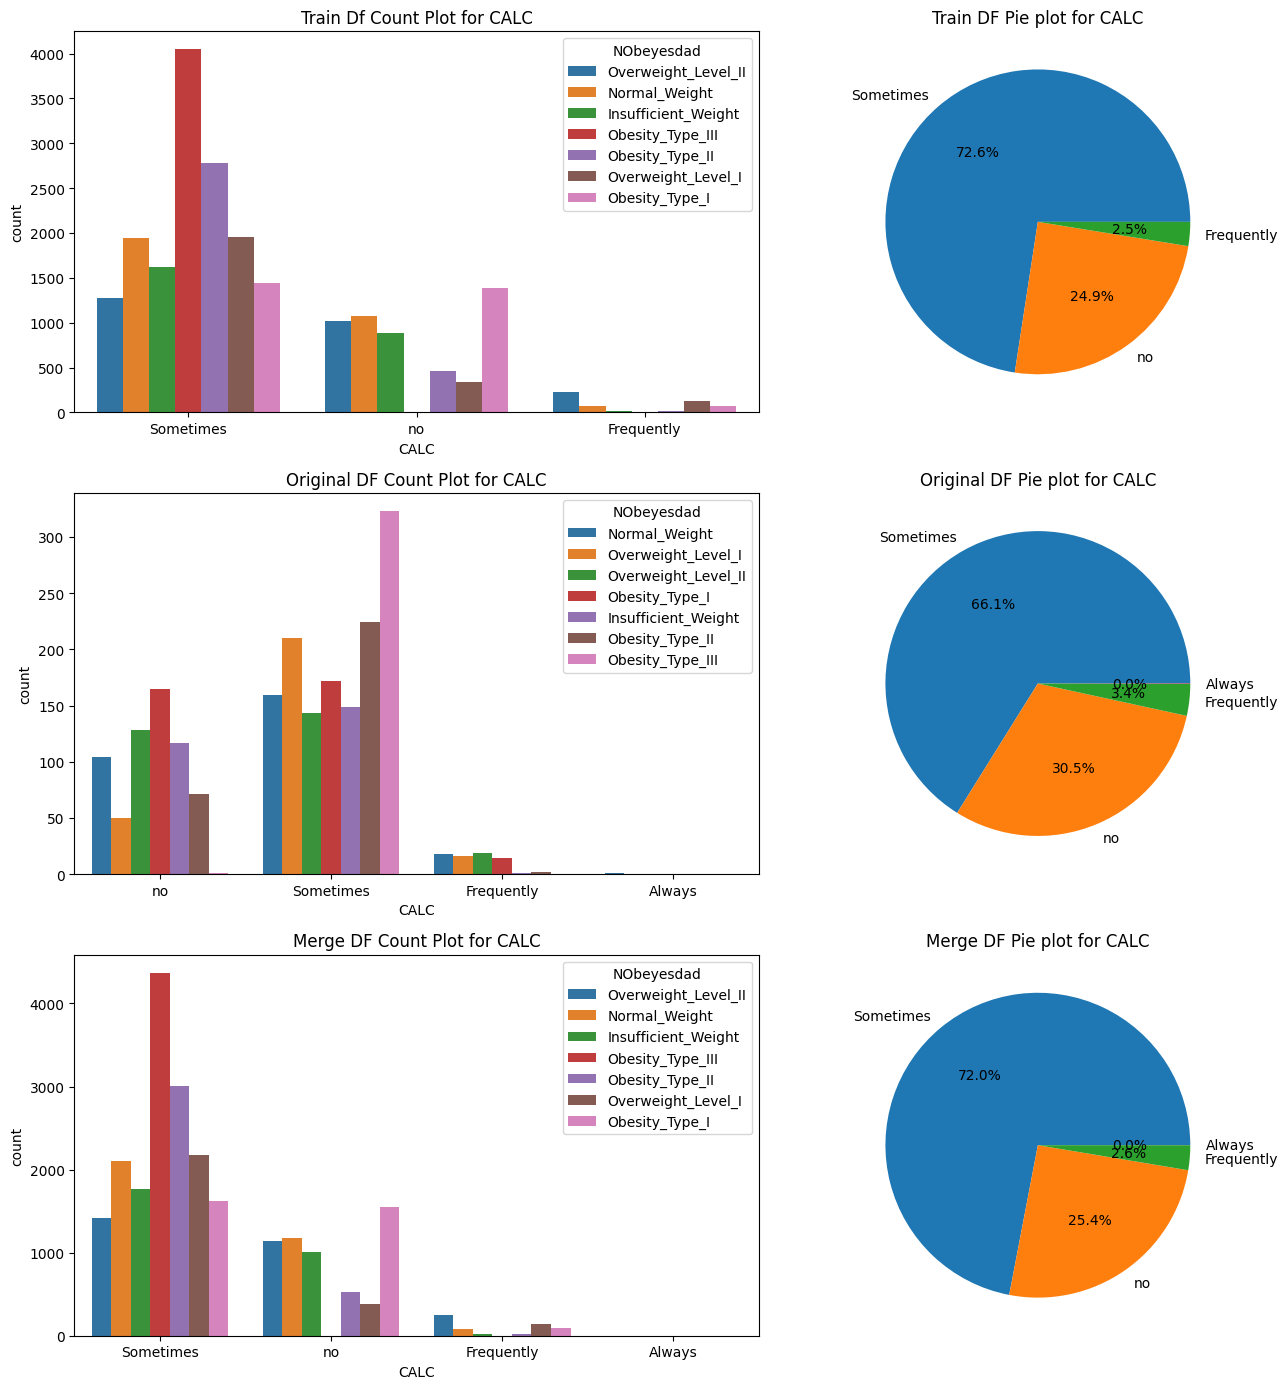

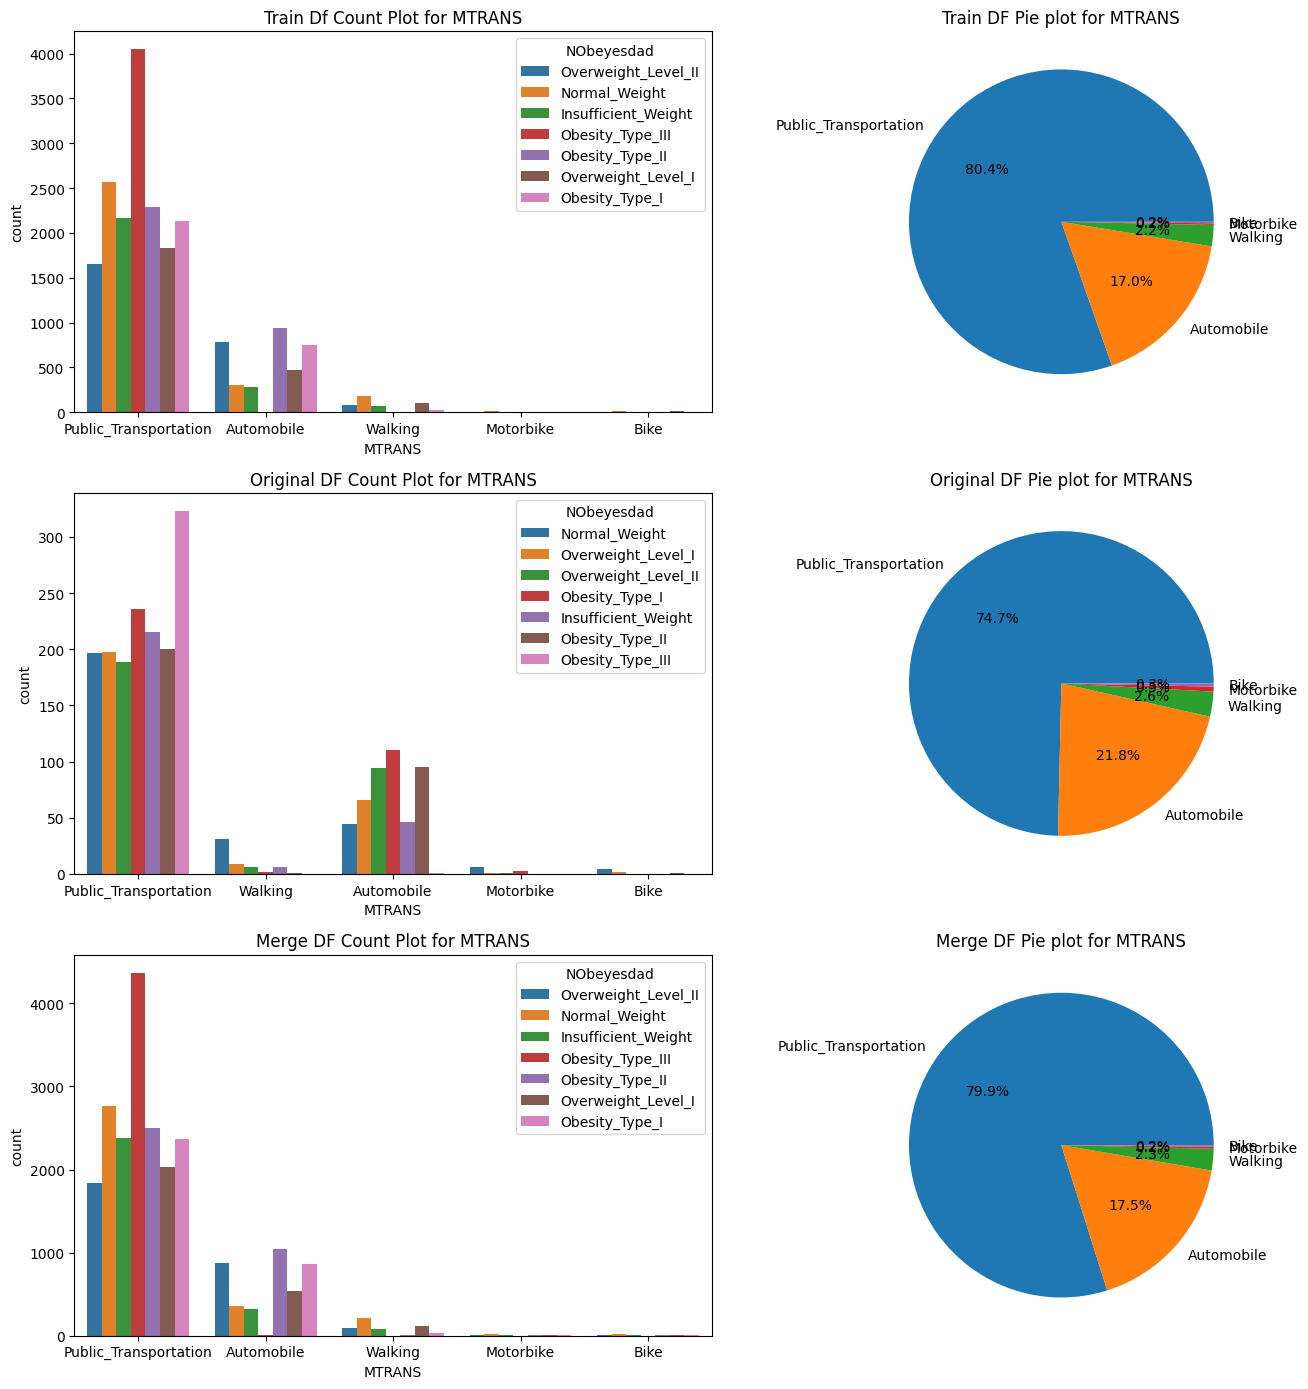

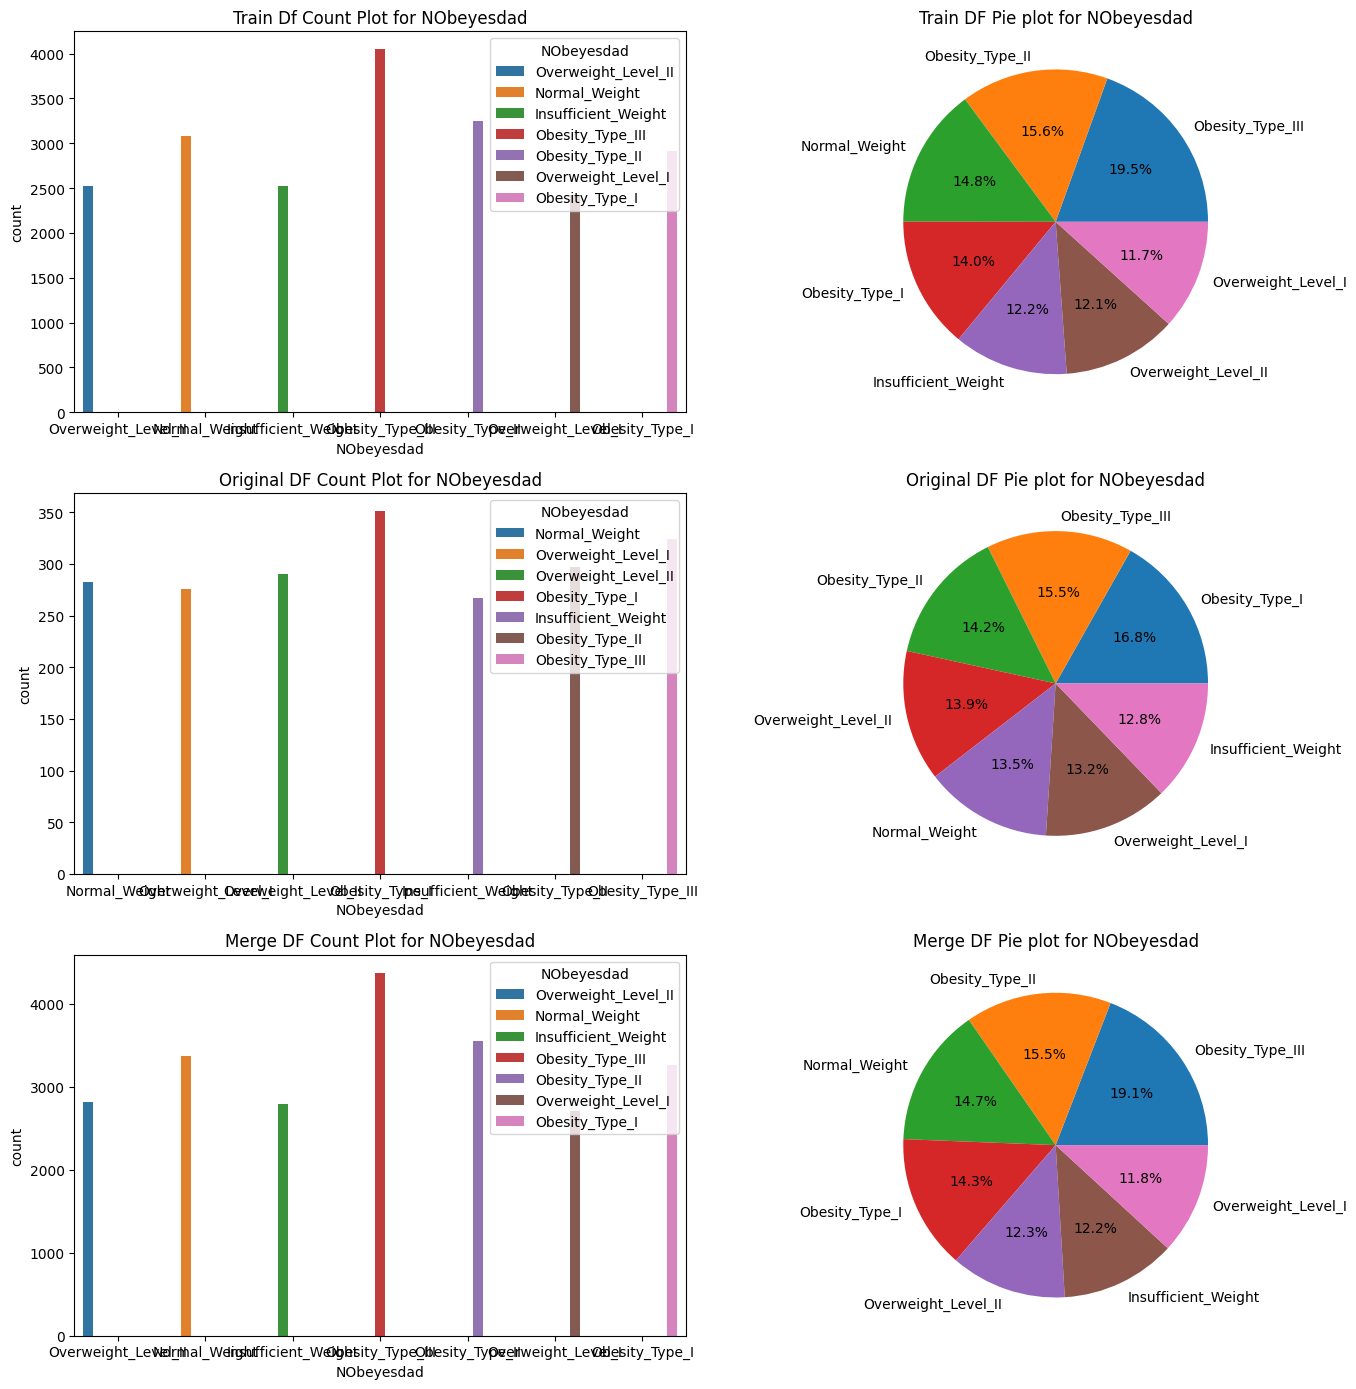

In [18]:
for column in merged_df.columns :
    DataAnalysis1(train_df, column, original_df, merged_data=merged_df)

<Axes: xlabel='Weight', ylabel='Height'>

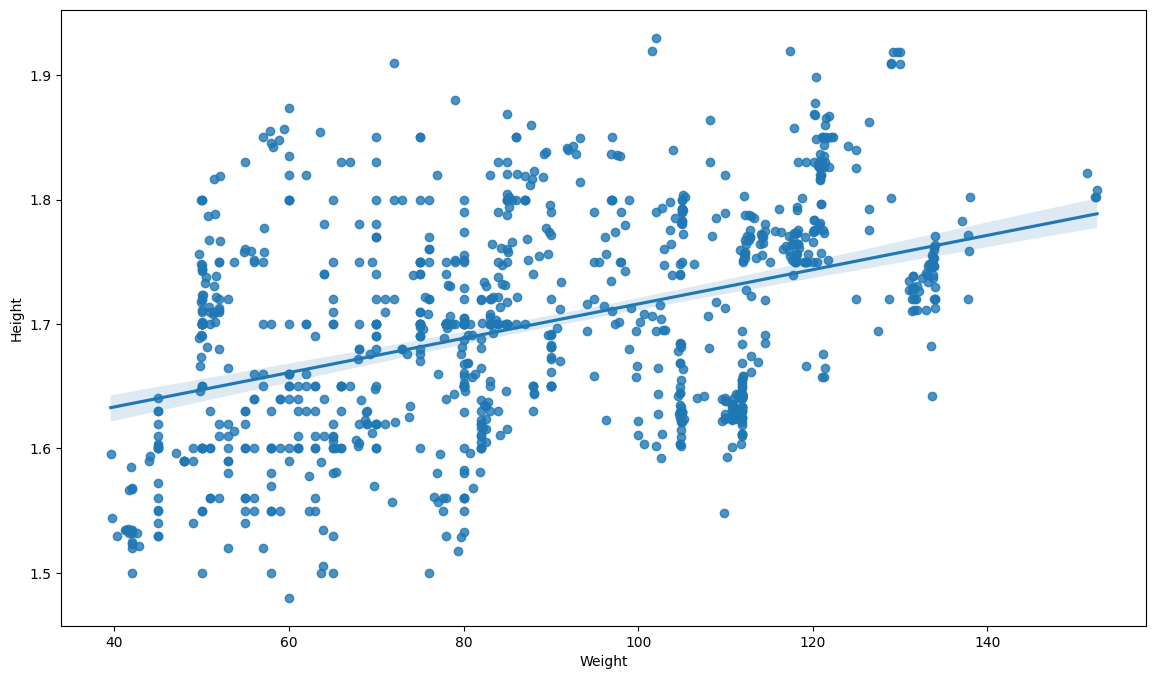

In [31]:
plt.figure(figsize=(14, 8))
data_sample = merged_df.sample(1000)
sns.regplot(x=data_sample['Weight'], y=data_sample['Height'])

<Axes: xlabel='Weight', ylabel='Age'>

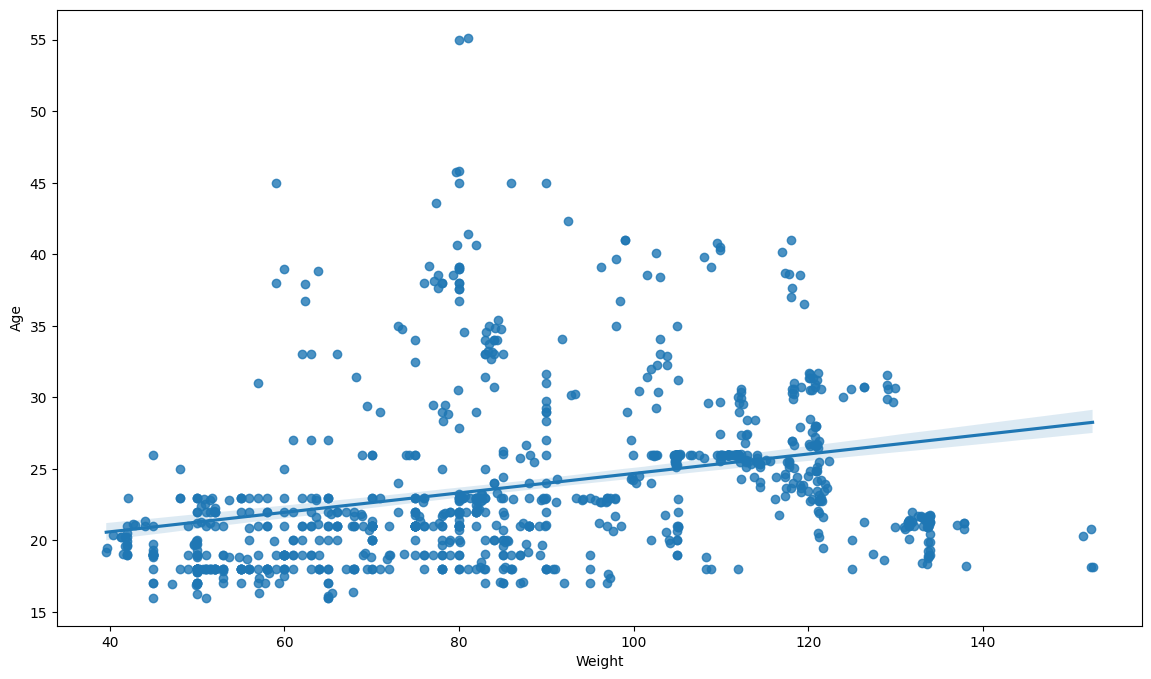

In [32]:
plt.figure(figsize=(14, 8))
sns.regplot(x=data_sample['Weight'], y=data_sample['Age'])

<Axes: xlabel='Weight', ylabel='Height'>

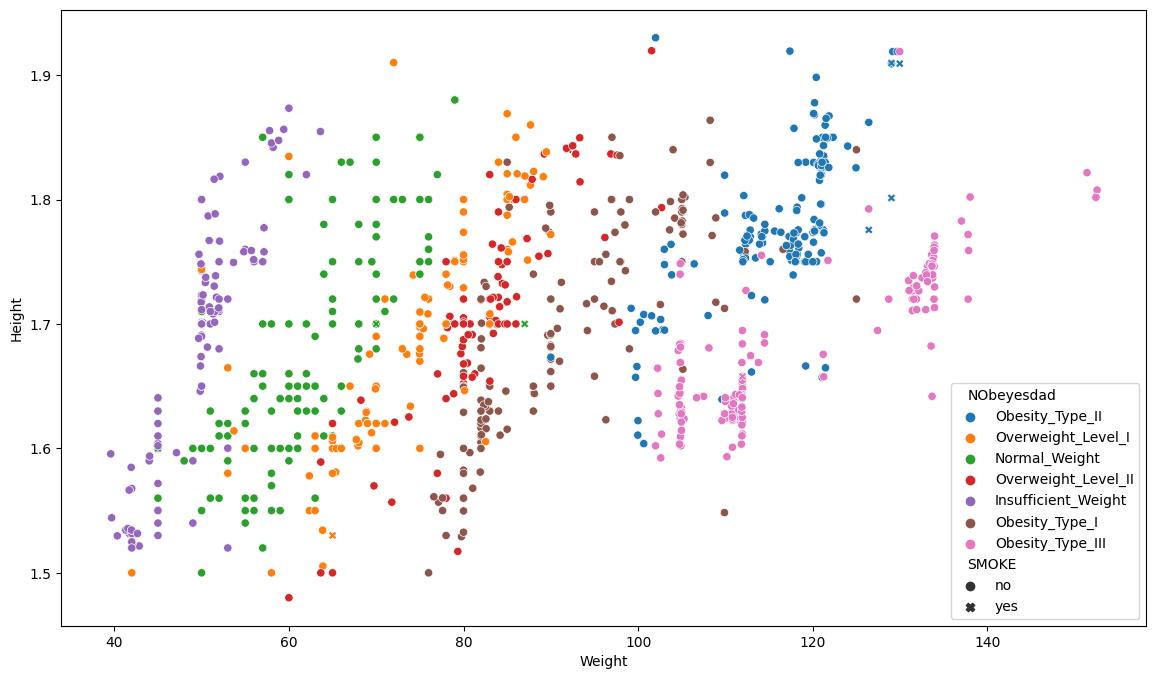

In [33]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=data_sample['Weight'], y=data_sample['Height'], hue=data_sample['NObeyesdad'], style=data_sample['SMOKE'])

<Axes: xlabel='Weight', ylabel='Height'>

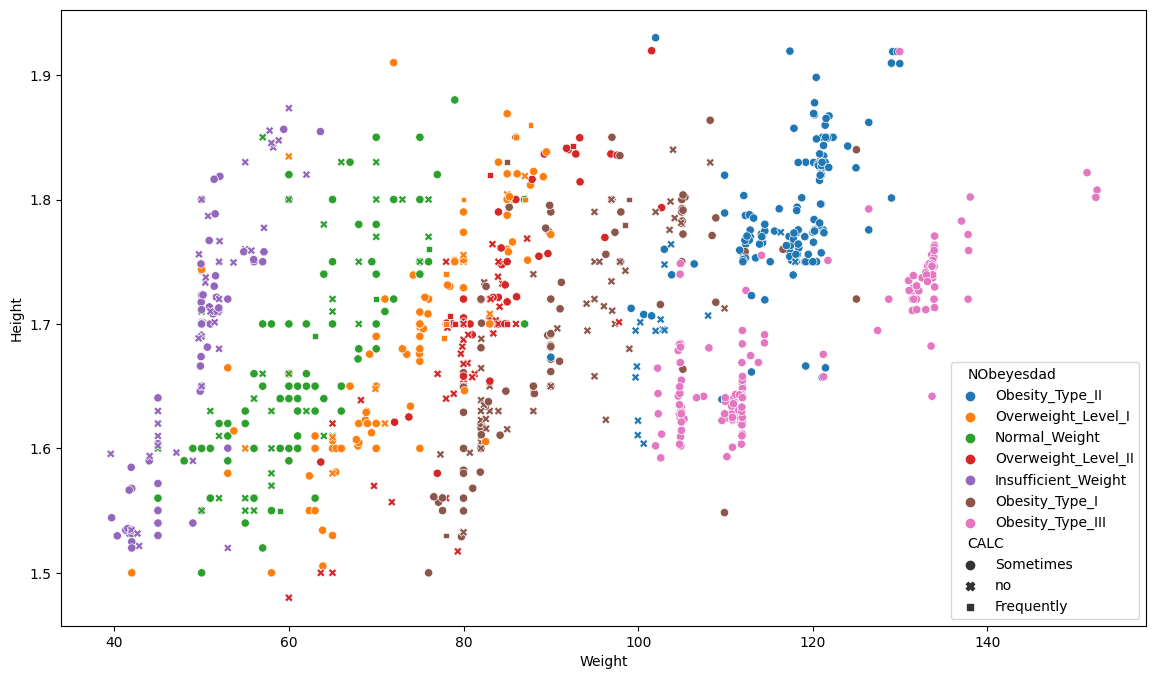

In [34]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=data_sample['Weight'], y=data_sample['Height'], hue=data_sample['NObeyesdad'], style=data_sample['CALC'])

<Axes: xlabel='Weight', ylabel='Height'>

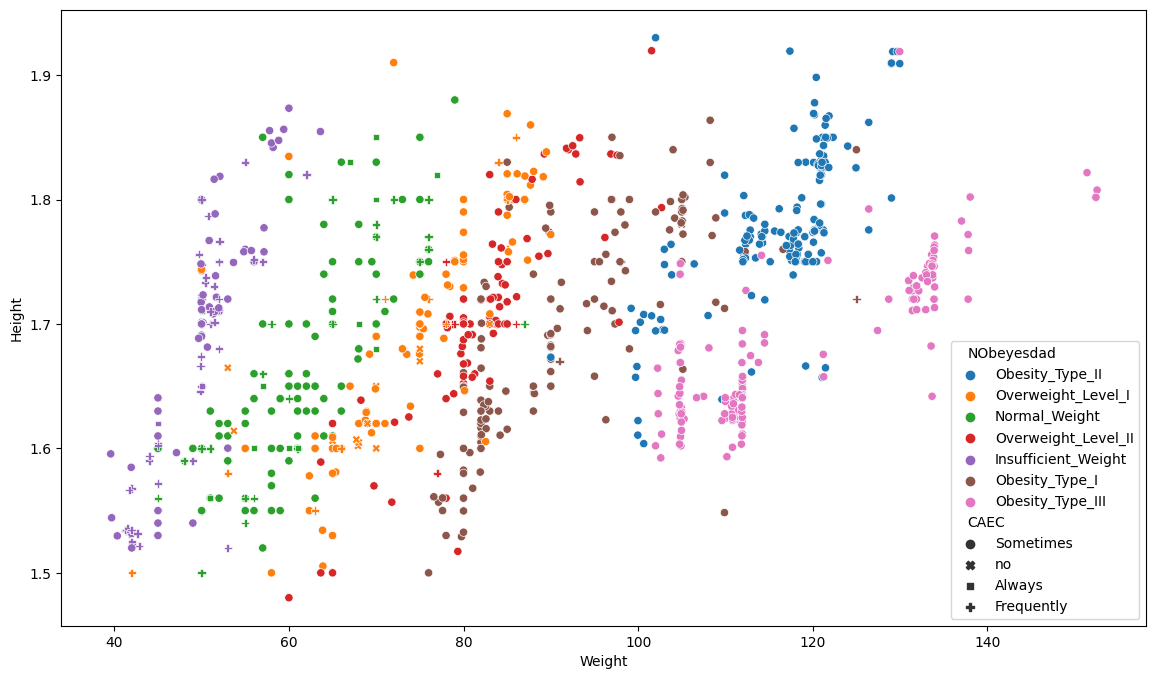

In [35]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=data_sample['Weight'], y=data_sample['Height'], hue=data_sample['NObeyesdad'], style=data_sample['CAEC'])

<Axes: xlabel='Weight', ylabel='Height'>

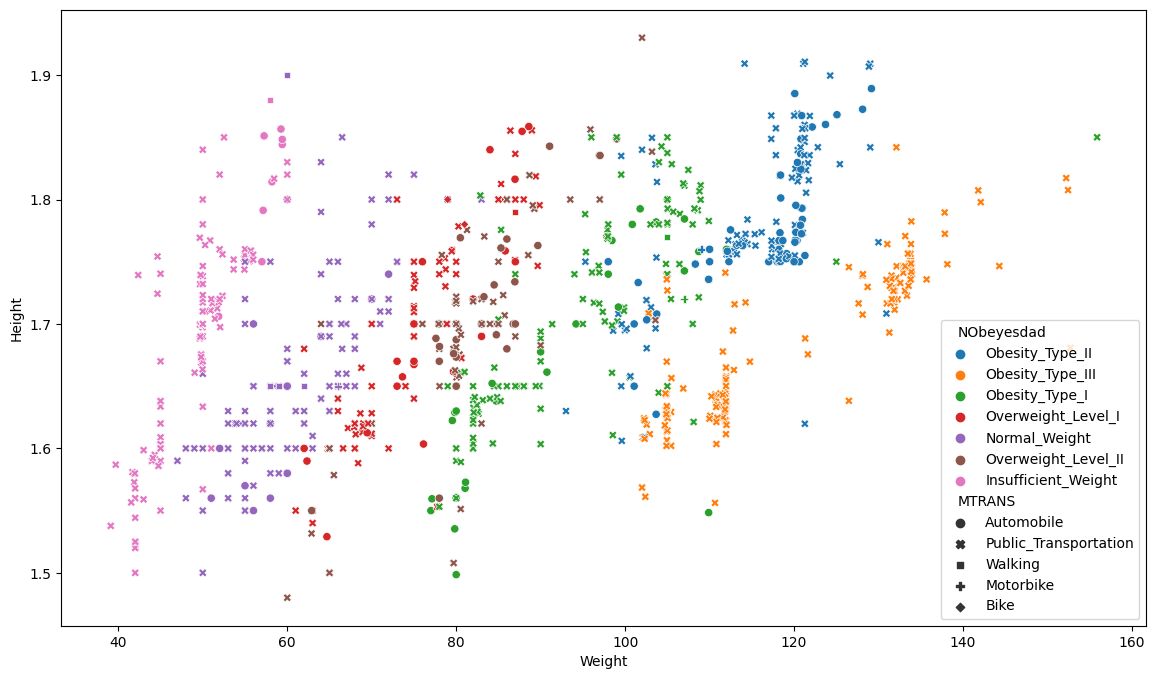

In [24]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=data_sample['Weight'], y=data_sample['Height'], hue=data_sample['NObeyesdad'], style=data_sample['MTRANS'])

<Axes: xlabel='Weight', ylabel='Height'>

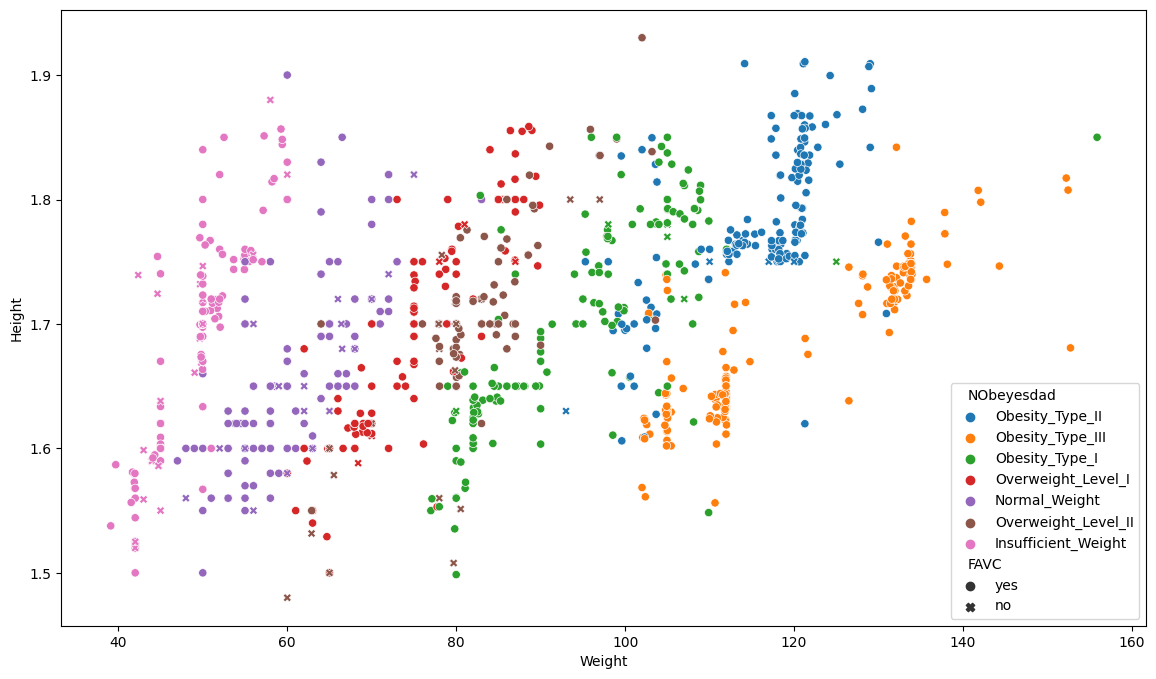

In [25]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=data_sample['Weight'], y=data_sample['Height'], hue=data_sample['NObeyesdad'], style=data_sample['FAVC'])

<Axes: xlabel='Weight', ylabel='FCVC'>

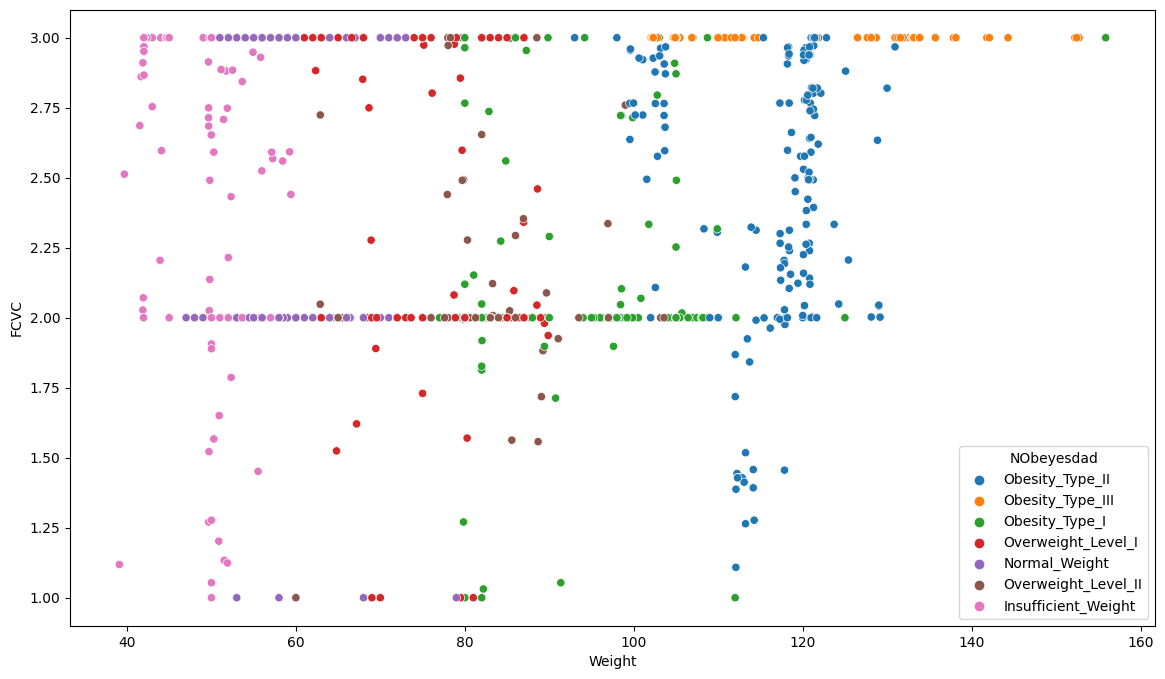

In [26]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=data_sample['Weight'], y=data_sample['FCVC'], hue=data_sample['NObeyesdad'])

In [27]:
# Checking Distribution of Data

def CheckDistribution(data, column) :
    num_cols = data.select_dtypes(np.number)
    plt.figure(figsize=(14, 8))
    # print(len(data[column]))
    if column in num_cols :
        plt.subplot(1,2,1)
        plt.title(f"Q-Q Plot for {column}")
        stats.probplot(data[column], dist="norm", plot=plt)
        plt.subplot(1,2,2)
        plt.title(f"KDE Plot for {column}")
        sns.kdeplot(data[column])
        plt.show()
        statistic, p_value = stats.shapiro(data[column])
        print(f"P-Value: {p_value}")
        print(f"Statistic: {statistic}")
        alpha = 0.05
        if p_value > alpha:
            print("Sample looks Gaussian (fail to reject H0)")
        else:
            print("Sample does not look Gaussian (reject H0)")



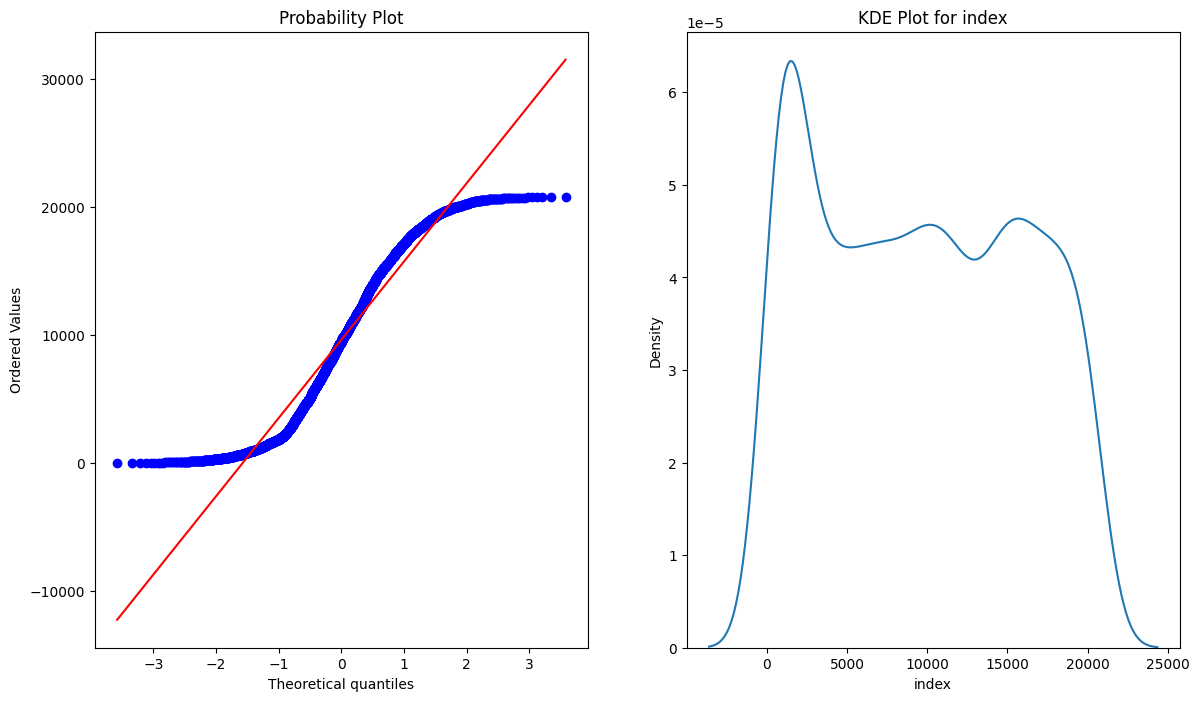

P-Value: 2.316103096115516e-37
Statistic: 0.9405819177627563
Sample does not look Gaussian (reject H0)


<Figure size 1400x800 with 0 Axes>

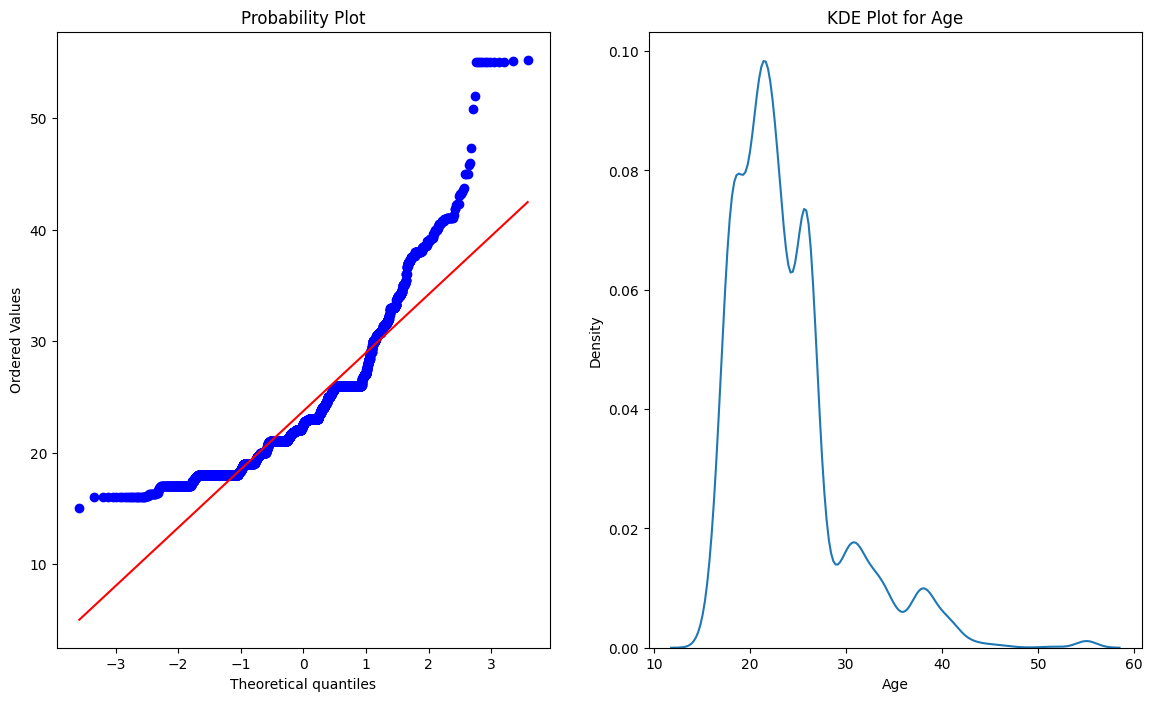

P-Value: 0.0
Statistic: 0.8643549680709839
Sample does not look Gaussian (reject H0)


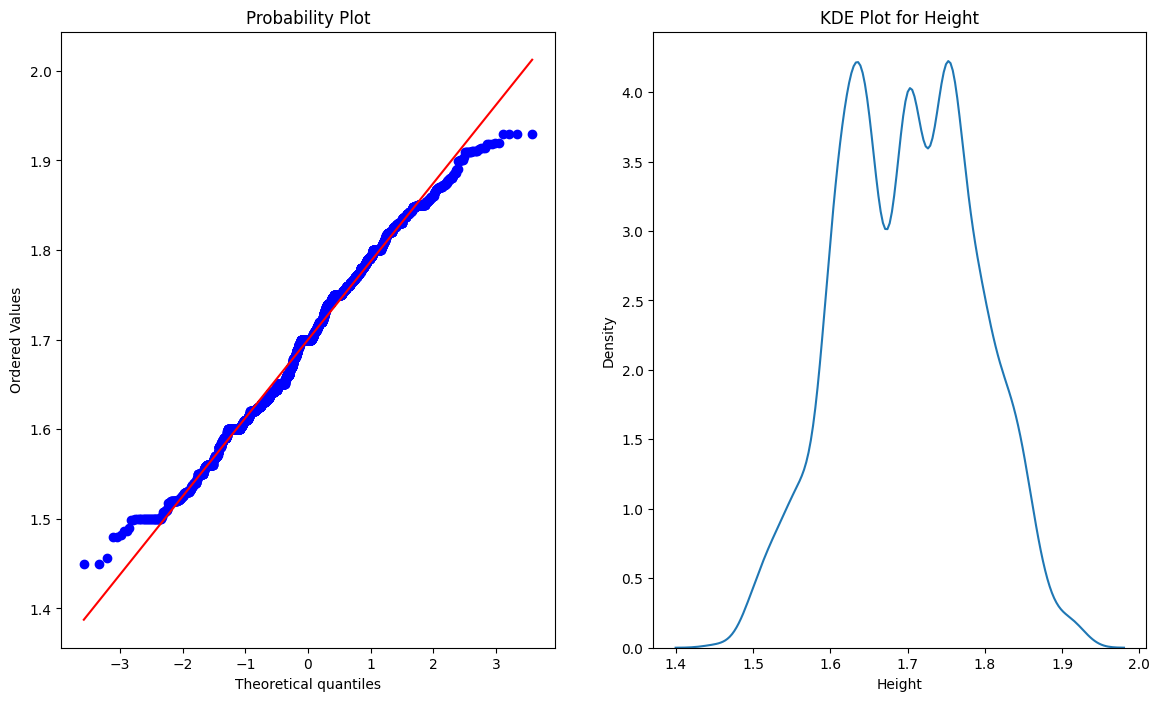

P-Value: 5.392597142211877e-15
Statistic: 0.9912459254264832
Sample does not look Gaussian (reject H0)


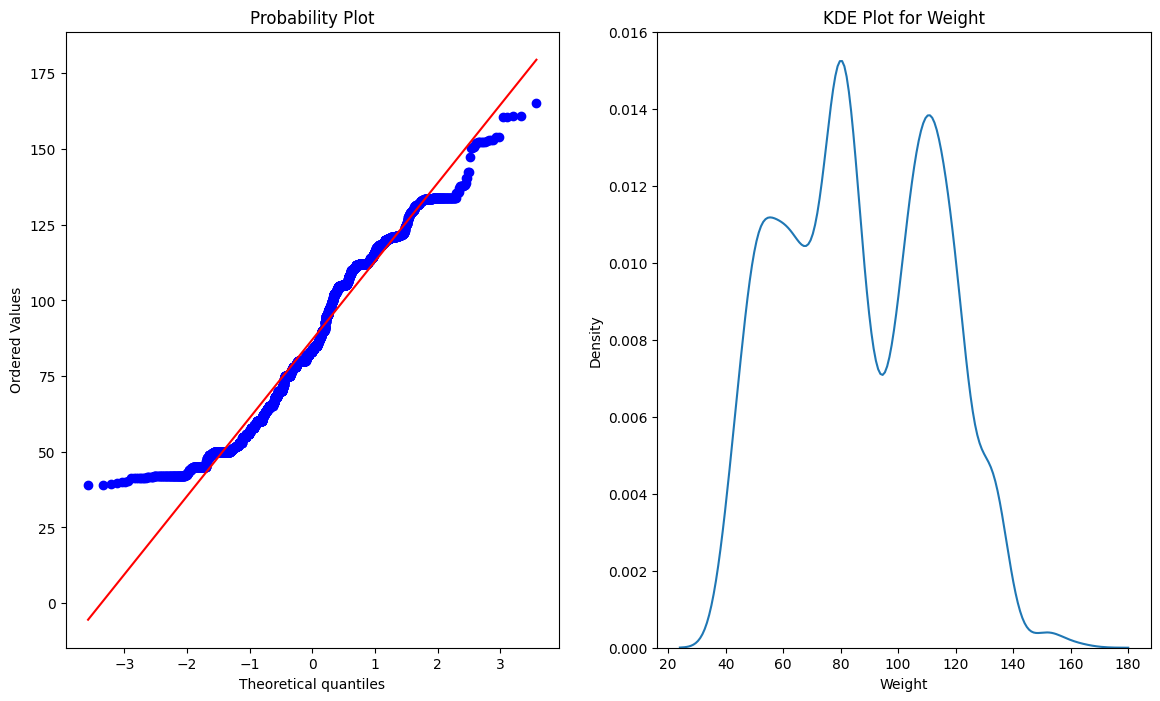

P-Value: 1.447267441026185e-29
Statistic: 0.9664455652236938
Sample does not look Gaussian (reject H0)


<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

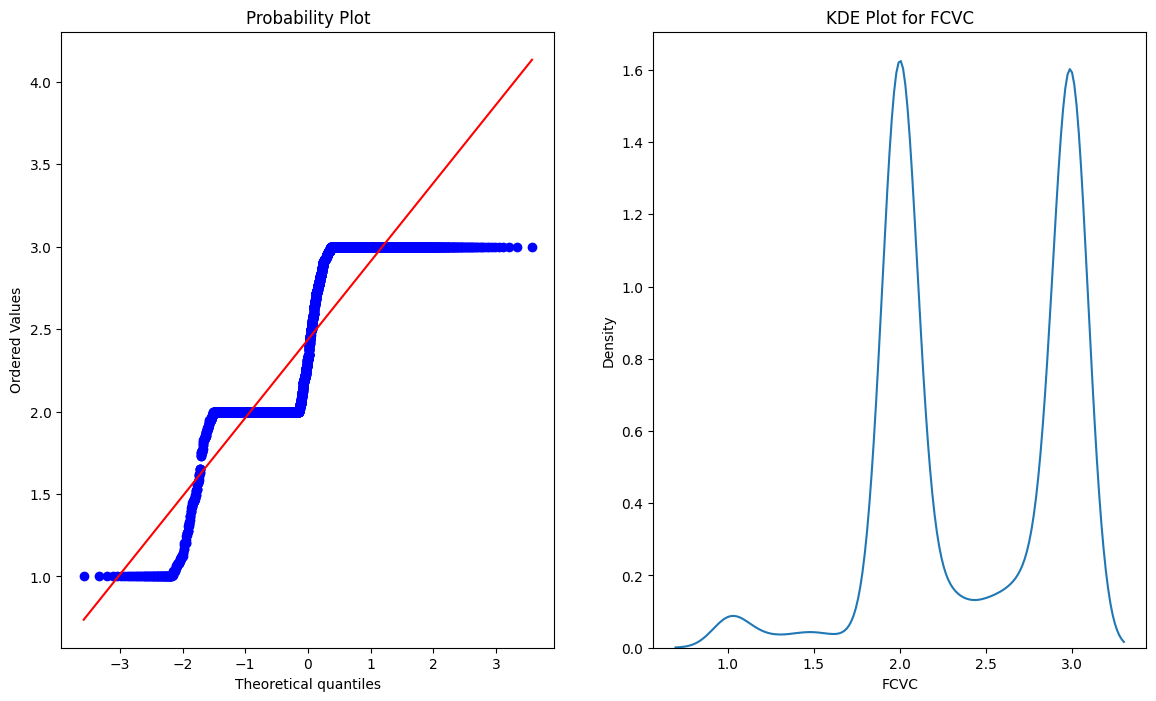

P-Value: 0.0
Statistic: 0.7931044697761536
Sample does not look Gaussian (reject H0)


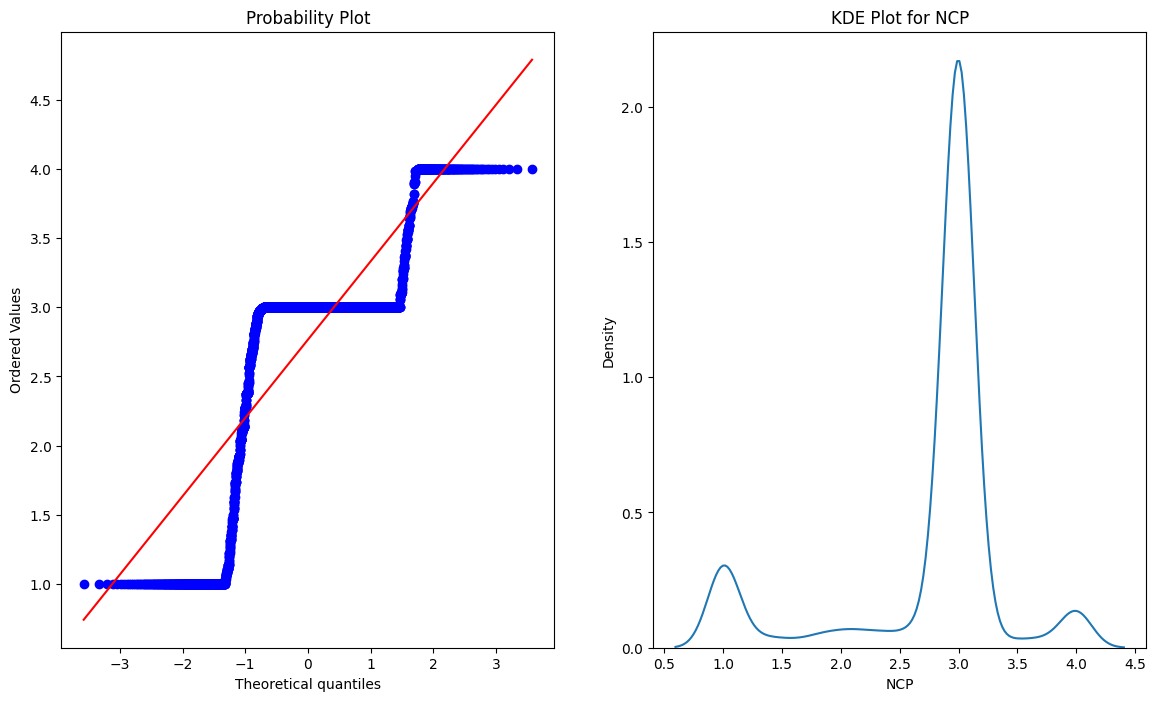

P-Value: 0.0
Statistic: 0.6391550302505493
Sample does not look Gaussian (reject H0)


<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

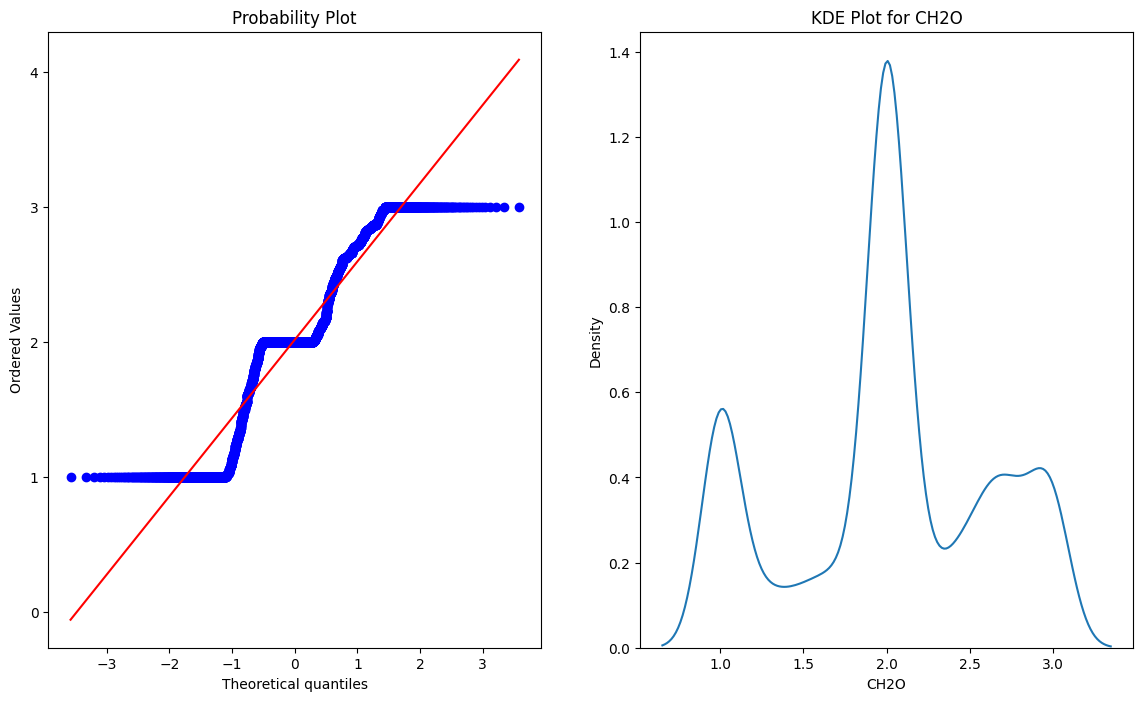

P-Value: 1.639519203260036e-43
Statistic: 0.910662829875946
Sample does not look Gaussian (reject H0)


<Figure size 1400x800 with 0 Axes>

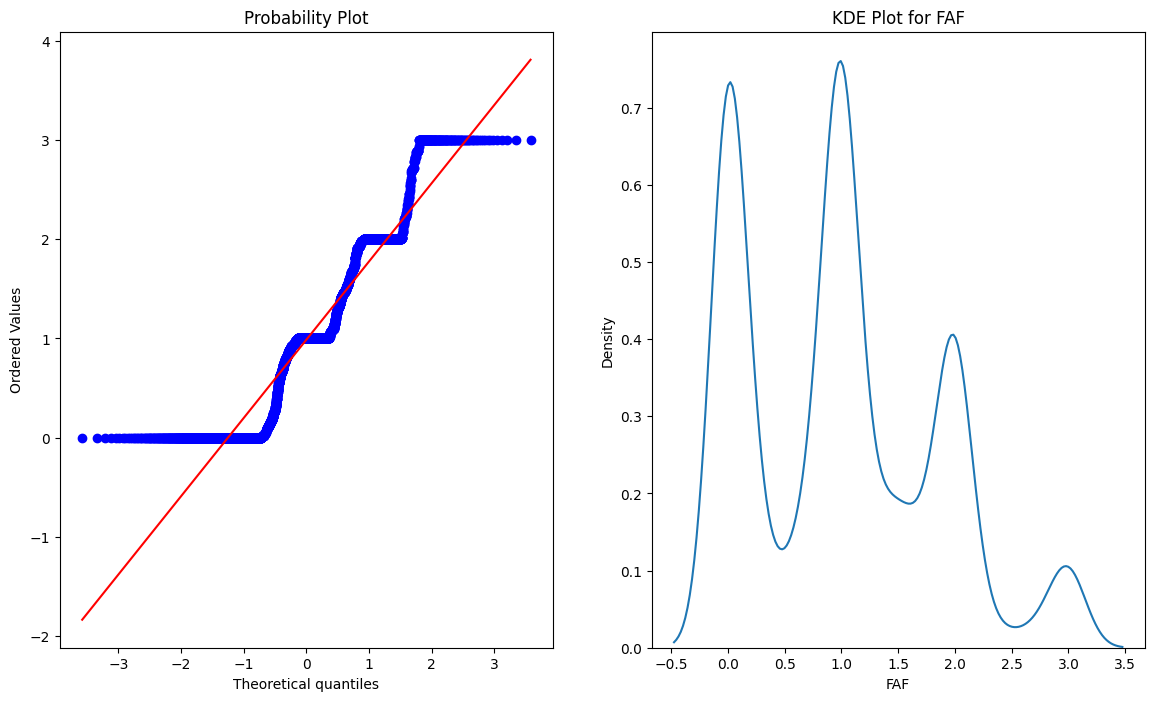

P-Value: 4.203895392974451e-45
Statistic: 0.9013640880584717
Sample does not look Gaussian (reject H0)


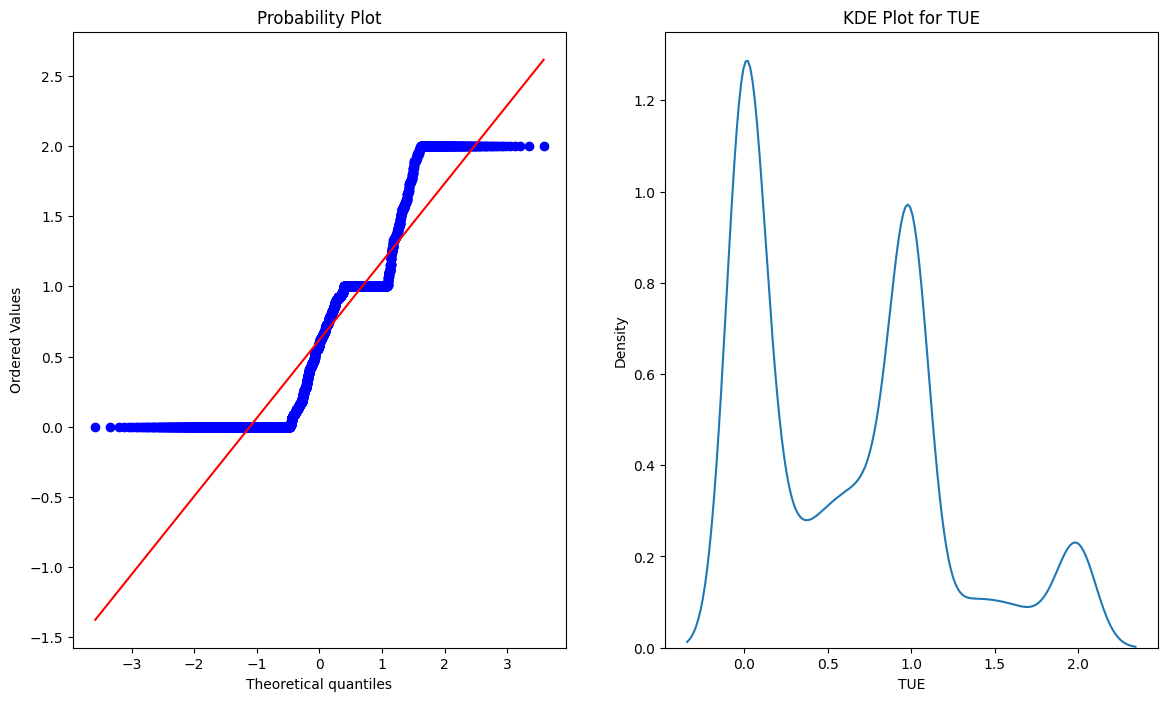

P-Value: 0.0
Statistic: 0.8597911596298218
Sample does not look Gaussian (reject H0)


<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

In [28]:
for column in merged_df.columns :

    CheckDistribution(merged_df.sample(4000), column)

In [29]:
# No data column look like normal distribution

In [30]:
# The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)

In [36]:
# Feature Engineering